# INF-552 HW3 SUBMISSION(Notebook)
<font color='black'></font>
<font size="5"></font>

## STUDENT NAME: Prateek Parhi
## USC ID: 7461350213

<br><br>
### 1. Time Series Classification
<br>
An interesting task in machine learning is classification of time series. In this problem,
we will classify the activities of humans based on time series obtained by a Wireless
Sensor Network.
<br>

In [39]:
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
sn.set(style='ticks')

import shutil
import os
import bootstrapped.bootstrap as bs
import bootstrapped.stats_functions as boot_stats

import statsmodels.api as sm
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB,GaussianNB
from sklearn.feature_selection import f_regression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
import statsmodels.formula.api as smf

from sklearn.preprocessing import StandardScaler
from texttable import Texttable
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix  
from sklearn.preprocessing import label_binarize
from sklearn.preprocessing import MinMaxScaler

from itertools import cycle
from imblearn.over_sampling import SMOTE
from collections import Counter

**QUESTION (a)** <br>
Download the AReM data from: https://archive.ics.uci.edu/ml/datasets/
Activity+Recognition+system+based+on+Multisensor+data+fusion+\%28AReM\
%29 . The dataset contains 7 folders that represent seven types of activities. In
each folder, there are multiple files each of which represents an instant of a human
performing an activity.1 Each file containis 6 time series collected from activities
of the same person, which are called avg rss12, var rss12, avg rss13, var rss13,
vg rss23, and ar rss23. There are 88 instances in the dataset, each of which contains 6 time series and each time series has 480 consecutive values.

**(Ans)** Displayed the number of files and their data in (b) part. BELOW!

<br><br>
**QUESTION (b)** <br>
Keep datasets 1 and 2 in folders bending1 and bending 2, as well as datasets 1,
2, and 3 in other folders as test data and other datasets as train data.
<br>

In [40]:
def divide_data_in_folders():
    folders_in_AReM=os.listdir('AReM/')
    files_in_bending1=os.listdir('AReM/bending1')
    files_in_bending1.sort()
    files_in_bending2=os.listdir('AReM/bending2')
    files_in_bending2.sort()
    files_in_lying=os.listdir('AReM/lying')
    files_in_lying.sort()
    files_in_cycling=os.listdir('AReM/cycling')
    files_in_cycling.sort()
    files_in_sitting=os.listdir('AReM/sitting')
    files_in_sitting.sort()
    files_in_standing=os.listdir('AReM/standing')
    files_in_standing.sort()
    files_in_walking=os.listdir('AReM/walking')
    files_in_walking.sort()

    ## create two new folders in AReM with the following names
    os.makedirs('AReM/testingdata/',exist_ok=True)
    os.makedirs('AReM/trainingdata/',exist_ok=True)

    ## to keep track of all the 88 instances and using it whenever needed like in c(ii)
    all_paths=[]   ## 88 instances
    trainfile_paths=[] ## 69 instances
    testfile_paths=[] ## 19 instances

    # copy testing data from bending1 and bending2: (dataset1,dataset2)
    for i,filename in enumerate(files_in_bending1):
        if i+1<=2:
            all_paths.append('AReM/bending1/'+filename)
            testfile_paths.append('AReM/bending1/'+filename)
        else:
            break

    for i,filename in enumerate(files_in_bending2):
        if i+1<=2:
            all_paths.append('AReM/bending2/'+filename)
            testfile_paths.append('AReM/bending2/'+filename)
        else:
            break


    for i,filename in enumerate(files_in_lying):
        if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
            all_paths.append('AReM/lying/'+filename)
            testfile_paths.append('AReM/lying/'+filename)        

    for i,filename in enumerate(files_in_cycling):
        if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
            all_paths.append('AReM/cycling/'+filename)
            testfile_paths.append('AReM/cycling/'+filename)        

    for i,filename in enumerate(files_in_sitting):
        if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
            all_paths.append('AReM/sitting/'+filename)    
            testfile_paths.append('AReM/sitting/'+filename)        

    for i,filename in enumerate(files_in_standing):
        if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
            all_paths.append('AReM/standing/'+filename) 
            testfile_paths.append('AReM/standing/'+filename)        

    for i,filename in enumerate(files_in_walking):
        if filename in ['dataset1.csv','dataset2.csv','dataset3.csv']:
            all_paths.append('AReM/walking/'+filename) 
            testfile_paths.append('AReM/walking/'+filename)        




    # copy training data from rest of the folders

    bending1=['dataset3.csv','dataset4.csv','dataset5.csv','dataset6.csv','dataset7.csv']

    bending2=['dataset3.csv','dataset4.csv','dataset5.csv','dataset6.csv']

    others=['dataset4.csv','dataset5.csv','dataset6.csv','dataset7.csv','dataset8.csv','dataset9.csv',
           'dataset10.csv','dataset11.csv','dataset12.csv','dataset13.csv','dataset14.csv','dataset15.csv']

    for i,filename in enumerate(files_in_bending1):
        if filename in bending1:
            all_paths.append('AReM/bending1/'+filename)
            trainfile_paths.append('AReM/bending1/'+filename)        

    for i,filename in enumerate(files_in_bending2):
        if filename in bending2:
            all_paths.append('AReM/bending2/'+filename)
            trainfile_paths.append('AReM/bending2/'+filename)        

    for i,filename in enumerate(files_in_lying):
        if filename in others:
            all_paths.append('AReM/lying/'+filename) 
            trainfile_paths.append('AReM/lying/'+filename)         

    for i,filename in enumerate(files_in_cycling):
        if filename in others:
            all_paths.append('AReM/cycling/'+filename) 
            trainfile_paths.append('AReM/cycling/'+filename)         

    for i,filename in enumerate(files_in_sitting):
        if filename in others:
            all_paths.append('AReM/sitting/'+filename) 
            trainfile_paths.append('AReM/sitting/'+filename)         

    for i,filename in enumerate(files_in_standing):
        if filename in others:
            all_paths.append('AReM/standing/'+filename)
            trainfile_paths.append('AReM/standing/'+filename)         

    for i,filename in enumerate(files_in_walking):
        if filename in others:
            all_paths.append('AReM/walking/'+filename)
            trainfile_paths.append('AReM/walking/'+filename)         


    ## print files in train and test folders
    testing_files=os.listdir('AReM/testingdata')
    training_files=os.listdir('AReM/trainingdata')
    print("Total 88 Data Files\n")
    print("Each Data File has 480 rows and 6 time-series columns\n")
    print('six time series features --\n 1. avg_rss12\n','2. var_rss12\n','3. avg_rss13\n','4. var_rss13\n','5. avg_rss23\n','6. var_rss23\n')
    return all_paths,trainfile_paths,testfile_paths
    
    
all_paths,trainfile_paths,testfile_paths=divide_data_in_folders()

Total 88 Data Files

Each Data File has 480 rows and 6 time-series columns

six time series features --
 1. avg_rss12
 2. var_rss12
 3. avg_rss13
 4. var_rss13
 5. avg_rss23
 6. var_rss23



In [41]:
print("\n ------ All file paths: ",len(all_paths)," Instances \n")
for paths in all_paths:
    print(paths)


 ------ All file paths:  88  Instances 

AReM/bending1/dataset1.csv
AReM/bending1/dataset2.csv
AReM/bending2/dataset1.csv
AReM/bending2/dataset2.csv
AReM/lying/dataset1.csv
AReM/lying/dataset2.csv
AReM/lying/dataset3.csv
AReM/cycling/dataset1.csv
AReM/cycling/dataset2.csv
AReM/cycling/dataset3.csv
AReM/sitting/dataset1.csv
AReM/sitting/dataset2.csv
AReM/sitting/dataset3.csv
AReM/standing/dataset1.csv
AReM/standing/dataset2.csv
AReM/standing/dataset3.csv
AReM/walking/dataset1.csv
AReM/walking/dataset2.csv
AReM/walking/dataset3.csv
AReM/bending1/dataset3.csv
AReM/bending1/dataset4.csv
AReM/bending1/dataset5.csv
AReM/bending1/dataset6.csv
AReM/bending1/dataset7.csv
AReM/bending2/dataset3.csv
AReM/bending2/dataset4.csv
AReM/bending2/dataset5.csv
AReM/bending2/dataset6.csv
AReM/lying/dataset10.csv
AReM/lying/dataset11.csv
AReM/lying/dataset12.csv
AReM/lying/dataset13.csv
AReM/lying/dataset14.csv
AReM/lying/dataset15.csv
AReM/lying/dataset4.csv
AReM/lying/dataset5.csv
AReM/lying/dataset6.cs

In [42]:
print("\n ------- Total test files: ",len(testfile_paths),"Instances \n")
for files in testfile_paths:
        print(files)   


 ------- Total test files:  19 Instances 

AReM/bending1/dataset1.csv
AReM/bending1/dataset2.csv
AReM/bending2/dataset1.csv
AReM/bending2/dataset2.csv
AReM/lying/dataset1.csv
AReM/lying/dataset2.csv
AReM/lying/dataset3.csv
AReM/cycling/dataset1.csv
AReM/cycling/dataset2.csv
AReM/cycling/dataset3.csv
AReM/sitting/dataset1.csv
AReM/sitting/dataset2.csv
AReM/sitting/dataset3.csv
AReM/standing/dataset1.csv
AReM/standing/dataset2.csv
AReM/standing/dataset3.csv
AReM/walking/dataset1.csv
AReM/walking/dataset2.csv
AReM/walking/dataset3.csv


In [43]:
print("\n ------- Total train files: ",len(trainfile_paths),"Instances \n")
for files in trainfile_paths:
        print(files)


 ------- Total train files:  69 Instances 

AReM/bending1/dataset3.csv
AReM/bending1/dataset4.csv
AReM/bending1/dataset5.csv
AReM/bending1/dataset6.csv
AReM/bending1/dataset7.csv
AReM/bending2/dataset3.csv
AReM/bending2/dataset4.csv
AReM/bending2/dataset5.csv
AReM/bending2/dataset6.csv
AReM/lying/dataset10.csv
AReM/lying/dataset11.csv
AReM/lying/dataset12.csv
AReM/lying/dataset13.csv
AReM/lying/dataset14.csv
AReM/lying/dataset15.csv
AReM/lying/dataset4.csv
AReM/lying/dataset5.csv
AReM/lying/dataset6.csv
AReM/lying/dataset7.csv
AReM/lying/dataset8.csv
AReM/lying/dataset9.csv
AReM/cycling/dataset10.csv
AReM/cycling/dataset11.csv
AReM/cycling/dataset12.csv
AReM/cycling/dataset13.csv
AReM/cycling/dataset14.csv
AReM/cycling/dataset15.csv
AReM/cycling/dataset4.csv
AReM/cycling/dataset5.csv
AReM/cycling/dataset6.csv
AReM/cycling/dataset7.csv
AReM/cycling/dataset8.csv
AReM/cycling/dataset9.csv
AReM/sitting/dataset10.csv
AReM/sitting/dataset11.csv
AReM/sitting/dataset12.csv
AReM/sitting/datase

### All the  Data Combined (88 Instances)

In [44]:
def complete_data(all_paths):
    data=dict()

    for i in range(0,len(all_paths),1):
        data[i]=0

    name=''

    time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','activity']

    for i,files in enumerate(all_paths):
        df=pd.read_csv(files)
        if(files[5:13]=='bending1'):
            name='bend1'
        elif(files[5:13]=='bending2'):
            name='bend2'
        else:
            name=files[5:9] 
        df.loc[:,'activity'] = name
        data[i]=df

    # training_data
    df_alldata=pd.DataFrame()
    df_alldata=data[0]
    for i in range(1,88,1):
        df2=data[i]
        df_alldata=pd.concat([df_alldata,df2], ignore_index=True)
    return df_alldata
    

df_alldata=complete_data(all_paths)

print("\n-------- COMPLETE DATA -----\n")
df_alldata


-------- COMPLETE DATA -----



,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bend1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bend1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bend1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bend1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bend1
5,1250,39.25,0.43,24.00,0.00,33.00,0.00,bend1
6,1500,39.25,0.43,24.00,0.00,33.00,0.00,bend1
7,1750,39.00,0.00,23.75,0.43,33.00,0.00,bend1
8,2000,39.50,0.50,24.00,0.00,33.00,0.00,bend1
9,2250,39.50,0.50,23.00,0.00,33.00,0.00,bend1


### Training Data Combined (69 Instances)

In [45]:
def training_datacombined(trainfile_paths):
    training_data=dict()

    for i in range(0,len(trainfile_paths),1):
        training_data[i]=0
    
    name=''

    time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','activity']

    for i,files in enumerate(trainfile_paths):
        df=pd.read_csv(files)
        if(files[5:13]=='bending1'):
            name='bend1'
        elif(files[5:13]=='bending2'):
            name='bend2'
        else:
            name=files[5:9] 
        df.loc[:,'activity'] = name
        training_data[i]=df

    # training_data
    df_traindata=pd.DataFrame()
    df_traindata=training_data[0]
    for i in range(1,69,1):
        df2=training_data[i]
        df_traindata=pd.concat([df_traindata,df2], ignore_index=True)

    return df_traindata


df_traindata=training_datacombined(trainfile_paths)
    
print("\n--------TRAINING DATA -----\n")
df_traindata


--------TRAINING DATA -----



,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,0,42.00,0.71,21.25,0.43,30.00,0.00,bend1
1,250,41.50,0.50,20.25,1.48,31.25,1.09,bend1
2,500,41.50,0.50,14.25,1.92,33.00,0.00,bend1
3,750,40.75,0.83,15.75,0.43,33.00,0.00,bend1
4,1000,40.00,0.71,20.00,2.74,32.75,0.43,bend1
5,1250,41.25,0.83,24.25,0.43,31.50,0.87,bend1
6,1500,42.25,0.43,23.75,0.43,35.25,1.30,bend1
7,1750,43.50,0.87,21.00,0.00,36.00,0.00,bend1
8,2000,42.75,0.83,21.25,0.43,36.00,0.00,bend1
9,2250,43.25,0.43,23.75,0.43,36.00,0.00,bend1


### Testing Data Combined (19 Instances)

In [46]:
def testing_datacombined(testfile_paths):
    testing_data=dict()

    for i in range(0,len(testfile_paths),1):
        testing_data[i]=0

    name=''

    time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23','activity']

    for i,files in enumerate(testfile_paths):
        df=pd.read_csv(files)
        if(files[5:13]=='bending1'):
            name='bend1'
        elif(files[5:13]=='bending2'):
            name='bend2'
        else:
            name=files[5:9] 
        df.loc[:,'activity'] = name
        testing_data[i]=df


    df_testdata=pd.DataFrame()
    df_testdata=testing_data[0]
    for i in range(1,19,1):
        df2=testing_data[i]
        df_testdata=pd.concat([df_testdata,df2], ignore_index=True)
        
    return df_testdata


df_testdata=testing_datacombined(testfile_paths)

print("\n--------TESTING DATA -----\n")
df_testdata


--------TESTING DATA -----



,# Columns: time,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,activity
0,0,39.25,0.43,22.75,0.43,33.75,1.30,bend1
1,250,39.25,0.43,23.00,0.00,33.00,0.00,bend1
2,500,39.25,0.43,23.25,0.43,33.00,0.00,bend1
3,750,39.50,0.50,23.00,0.71,33.00,0.00,bend1
4,1000,39.50,0.50,24.00,0.00,33.00,0.00,bend1
5,1250,39.25,0.43,24.00,0.00,33.00,0.00,bend1
6,1500,39.25,0.43,24.00,0.00,33.00,0.00,bend1
7,1750,39.00,0.00,23.75,0.43,33.00,0.00,bend1
8,2000,39.50,0.50,24.00,0.00,33.00,0.00,bend1
9,2250,39.50,0.50,23.00,0.00,33.00,0.00,bend1


<br><br>
### (C) FEATURE EXTRACTION

<br><br>
**QUESTON (C)(i)**<br>
Research what types of time-domain features are usually used in time series
classification and list them (examples are minimum, maximum, mean, etc)
<br>

In [47]:
def list_timedomain_features():
    print("-------- Time domain features used in a time series classification are:---------\n")
    print("Mean")
    print("Median")
    print("Variance")
    print("Skewness")
    print("Quantiles(25th,75th and Interquartile ranges)")
    print("Standard Deviation")
    print("Miniumum and Maximum Values")
    
    
list_timedomain_features()


-------- Time domain features used in a time series classification are:---------

Mean
Median
Variance
Skewness
Quantiles(25th,75th and Interquartile ranges)
Standard Deviation
Miniumum and Maximum Values


<br><br>
**QUESTION(C)(ii)**<br>
Extract the time-domain features minimum, maximum, mean, median, standard deviation, first quartile, and third quartile for all of the 6 time series
in each instance. You are free to normalize/standardize features or use them
directly.
<br>

In [48]:
def extract_timedomain_features(all_paths):
    time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']

    columns=['avg_rss12_max', 'avg_rss12_min','avg_rss12_mean','avg_rss12_median','avg_rss12_std','avg_rss12_quart25','avg_rss12_quart75',
            'var_rss12_max', 'var_rss12_min','var_rss12_mean','var_rss12_median','var_rss12_stdt','var_rss12_quart25','var_rss12_quart75',
            'avg_rss13_max', 'avg_rss13_min','avg_rss13_mean','avg_rss13_median','avg_rss13_std','avg_rss13_quart25','avg_rss13_quart75',
            'var_rss13_max', 'var_rss13_min','var_rss13_mean','var_rss13_median','var_rss13_std','var_rss13_quart25','var_rss13_quart75',
            'avg_rss23_max', 'avg_rss23_min','avg_rss23_mean','avg_rss23_median','avg_rss23_std','avg_rss23_quart25','avg_rss23_quart75',
            'var_rss23_max', 'var_rss23_min','var_rss23_mean','var_rss23_median','var_rss23_std','var_rss23_quart25','var_rss23_quart75']

    time_domain_feature = pd.DataFrame(columns=columns)


    feature_row=[]


    for rowidx,paths in enumerate(all_paths):
        df=pd.read_csv(paths)
        for col in time_series:
            ts_max=df[col].max()
            feature_row.append(ts_max)

            ts_min=df[col].min()
            feature_row.append(ts_min)

            ts_mean=df[col].mean()
            feature_row.append(ts_mean)

            ts_median=df[col].median()
            feature_row.append(ts_median)

            ts_std=df[col].std()
            feature_row.append(ts_std)

            ts_quant1=df[col].quantile(0.25)
            feature_row.append(ts_quant1)

            ts_quant3=df[col].quantile(0.75)
            feature_row.append(ts_quant3)
            
        for colidx,colname in enumerate(columns):
            time_domain_feature.at[rowidx,colname]=feature_row[colidx]
        feature_row=[]
    
    return time_domain_feature



time_domain_feature=extract_timedomain_features(all_paths)

print("------------- Time domain features of all the data: ------------\n")
time_domain_feature

------------- Time domain features of all the data: ------------



,avg_rss12_max,avg_rss12_min,avg_rss12_mean,avg_rss12_median,avg_rss12_std,avg_rss12_quart25,avg_rss12_quart75,var_rss12_max,var_rss12_min,var_rss12_mean,...,avg_rss23_std,avg_rss23_quart25,avg_rss23_quart75,var_rss23_max,var_rss23_min,var_rss23_mean,var_rss23_median,var_rss23_std,var_rss23_quart25,var_rss23_quart75
0,45,37.25,40.6248,40.5,1.47697,39.25,42,1.3,0,0.358604,...,2.18845,33,36,1.92,0,0.570583,0.43,0.582915,0,1.3
1,45.67,38,42.8128,42.5,1.43555,42,43.67,1.22,0,0.372438,...,1.99525,32,34.5,3.11,0,0.571083,0.43,0.60101,0,1.3
2,51,12.75,24.563,24.25,3.73751,23.1875,26.5,6.87,0,0.590833,...,3.69379,20.5,27,4.97,0,0.700188,0.5,0.69372,0.43,0.87
3,42.75,0,27.4646,28,3.58358,25.5,30,7.76,0,0.449708,...,5.05364,15,20.75,6.76,0,1.12213,0.83,1.01234,0.47,1.3
4,30,23.5,27.7164,27.5,1.44225,27,29,1.79,0,0.363688,...,4.07451,5.5,10.75,4.5,0,0.734271,0.71,0.613688,0.43,1
5,48.33,24.75,44.1829,48,7.49562,48,48,3.11,0,0.101875,...,3.27454,2,5.5425,3.91,0,0.692771,0.5,0.675781,0.3225,0.94
6,48.25,48,48.0042,48,0.0320382,48,48,0.43,0,0.00716667,...,3.2685,4.67,10,2.5,0,0.641229,0.5,0.388372,0.46,0.83
7,45,24.25,37.177,36.25,3.5813,34.5,40.25,8.58,0,2.37421,...,2.89035,17.95,21.75,9.34,0,2.92173,2.5,1.8526,1.5,3.9
8,44.75,28.75,37.5612,36.875,3.22651,35.25,40.25,9.91,0,2.08069,...,2.72738,18,21.5,9.62,0,2.7659,2.45,1.7692,1.41,3.77
9,44.67,22,37.0587,36,3.71018,34.5,40.0625,14.17,0,2.43815,...,3.53714,16,21,8.55,0,2.98375,2.57,1.81573,1.5,4.15


<br><br>
**QUESTION(C)(iii)** <br>
Estimate the standard deviation of each of the time-domain features you
extracted from the data. Then, use Python’s bootstrapped or any other
method to build a 90% bootsrap confidence interval for the standard deviation
of each feature

In [49]:
def estimate_std_timedomainfeatures(time_domain_features):
    std_estimate = pd.DataFrame(time_domain_feature.std())
    std_estimate.columns=['estimate_SD']
    return std_estimate


def build_Confidence_Interval(std_estimate,time_domain_features):
    confidence_intervals=pd.DataFrame(columns=["CI for Standard Deviation"])
    for i,colname in enumerate(time_domain_feature):
        arr=np.asarray(time_domain_feature[colname]).astype(np.float64)
        feature_CI = bs.bootstrap(arr,stat_func = boot_stats.std,alpha=0.1)
        confidence_intervals.loc[colname] = feature_CI.value
        
    Bootstrap_SD=pd.concat([std_estimate,confidence_intervals],ignore_index=True, axis=1)
    Bootstrap_SD.columns=['estimate_SD','Confidence Intervals']
    return Bootstrap_SD



std_estimate = estimate_std_timedomainfeatures(time_domain_feature)
Bootstrap_SD = build_Confidence_Interval(std_estimate,time_domain_feature)

print("\nEstimated Standard Deviation and their 90% bootsrap confidence interval for the standard deviation of each feature\n")
Bootstrap_SD


Estimated Standard Deviation and their 90% bootsrap confidence interval for the standard deviation of each feature



,estimate_SD,Confidence Intervals
avg_rss12_max,4.394362,4.369322
avg_rss12_min,9.569975,9.515445
avg_rss12_mean,5.335708,5.305304
avg_rss12_median,5.440054,5.409056
avg_rss12_std,1.772161,1.762063
avg_rss12_quart25,6.153590,6.118526
avg_rss12_quart75,5.138925,5.109643
var_rss12_max,5.062729,5.033882
var_rss12_min,0.000000,0.000000
var_rss12_mean,1.574162,1.565193


<br><br>
**QUESTION(C)(iv)** <br>
Use your judgement to select the three most important time-domain features
(one option may be min, mean, and max).
<br>

**Ans)** <br>
*Mean*<br>
*Median*<br> 
*Standard Deviation*<br><br>
These are the three most important time domain features which will  
give us a better idea about the curve and the underlying patterns

<br><br><br>
###  (D) Binary Classification Using Logistic Regression

<br>

**QUESTION D(i):**  <br>
Assume that you want to use the training set to classify bending from other
activities, i.e. you have a binary classification problem. Depict scatter plots
of the features you specified in 1(c)iv extracted from time series 1, 2, and 6 of
each instance, and use color to distinguish bending vs. other activities

In [50]:
def find_timedomain_for_timeseries(trainfile_paths):
    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std',
            'class']
    
    ## Column 1,2 and 6
    time_series=['avg_rss12','var_rss12','var_rss23']  

    time_domain_bending_rest = pd.DataFrame(columns=column)

    feature_row=[]

    for rowidx,paths in enumerate(trainfile_paths):
        df=pd.read_csv(paths)
        for col in time_series:      
            ts_mean=df[col].mean()
            feature_row.append(ts_mean)

            ts_median=df[col].median()
            feature_row.append(ts_median)

            ts_std=df[col].std()
            feature_row.append(ts_std)

        if(rowidx<9):  ## 0-8 are training files from the bending folder (had to be hardcoded either by filename or index!)
            feature_row.append(1)
        else:
            feature_row.append(0)
        for colidx,colname in enumerate(column):
            time_domain_bending_rest.at[rowidx,colname]=feature_row[colidx]
        feature_row=[]
        
    return time_domain_bending_rest

        
    
    
time_domain_bending_rest = find_timedomain_for_timeseries(trainfile_paths)

print("\nData showing time domain features computed for time series 1,2 and 6 and classifiying bending from non-bending")
time_domain_bending_rest


Data showing time domain features computed for time series 1,2 and 6 and classifiying bending from non-bending


,avg_rss12_mean,avg_rss12_median,avg_rss12_std,var_rss12_mean,var_rss12_median,var_rss12_std,var_rss23_mean,var_rss23_median,var_rss23_std,class
0,43.9545,44.33,1.55884,0.42625,0.47,0.33869,0.493292,0.43,0.513506,1
1,42.1798,43.5,3.67067,0.696042,0.5,0.63086,0.613521,0.5,0.524317,1
2,41.6781,41.75,2.24349,0.535979,0.5,0.405469,0.383292,0.43,0.389164,1
3,43.455,43.25,1.3861,0.378083,0.47,0.315566,0.679646,0.5,0.622534,1
4,43.9691,44.5,1.61836,0.413125,0.47,0.263111,0.555313,0.49,0.487826,1
5,32.5862,33,6.23814,0.516125,0.43,0.789957,1.16204,0.83,1.33298,1
6,29.8819,30,1.15384,0.256438,0,0.275833,0.701625,0.71,0.481103,1
7,30.9381,29,7.68415,0.467167,0.43,0.734444,1.10735,0.83,1.08084,1
8,31.0582,29.71,4.82979,0.405458,0.43,0.566668,1.0981,0.94,0.83148,1
9,27.7164,27.5,1.44225,0.363688,0.43,0.394817,0.735396,0.71,0.612834,0



Scatter Plot for time domain features for time series 1,2 and 6 and classifiying bending from non-bending


<Figure size 936x936 with 0 Axes>

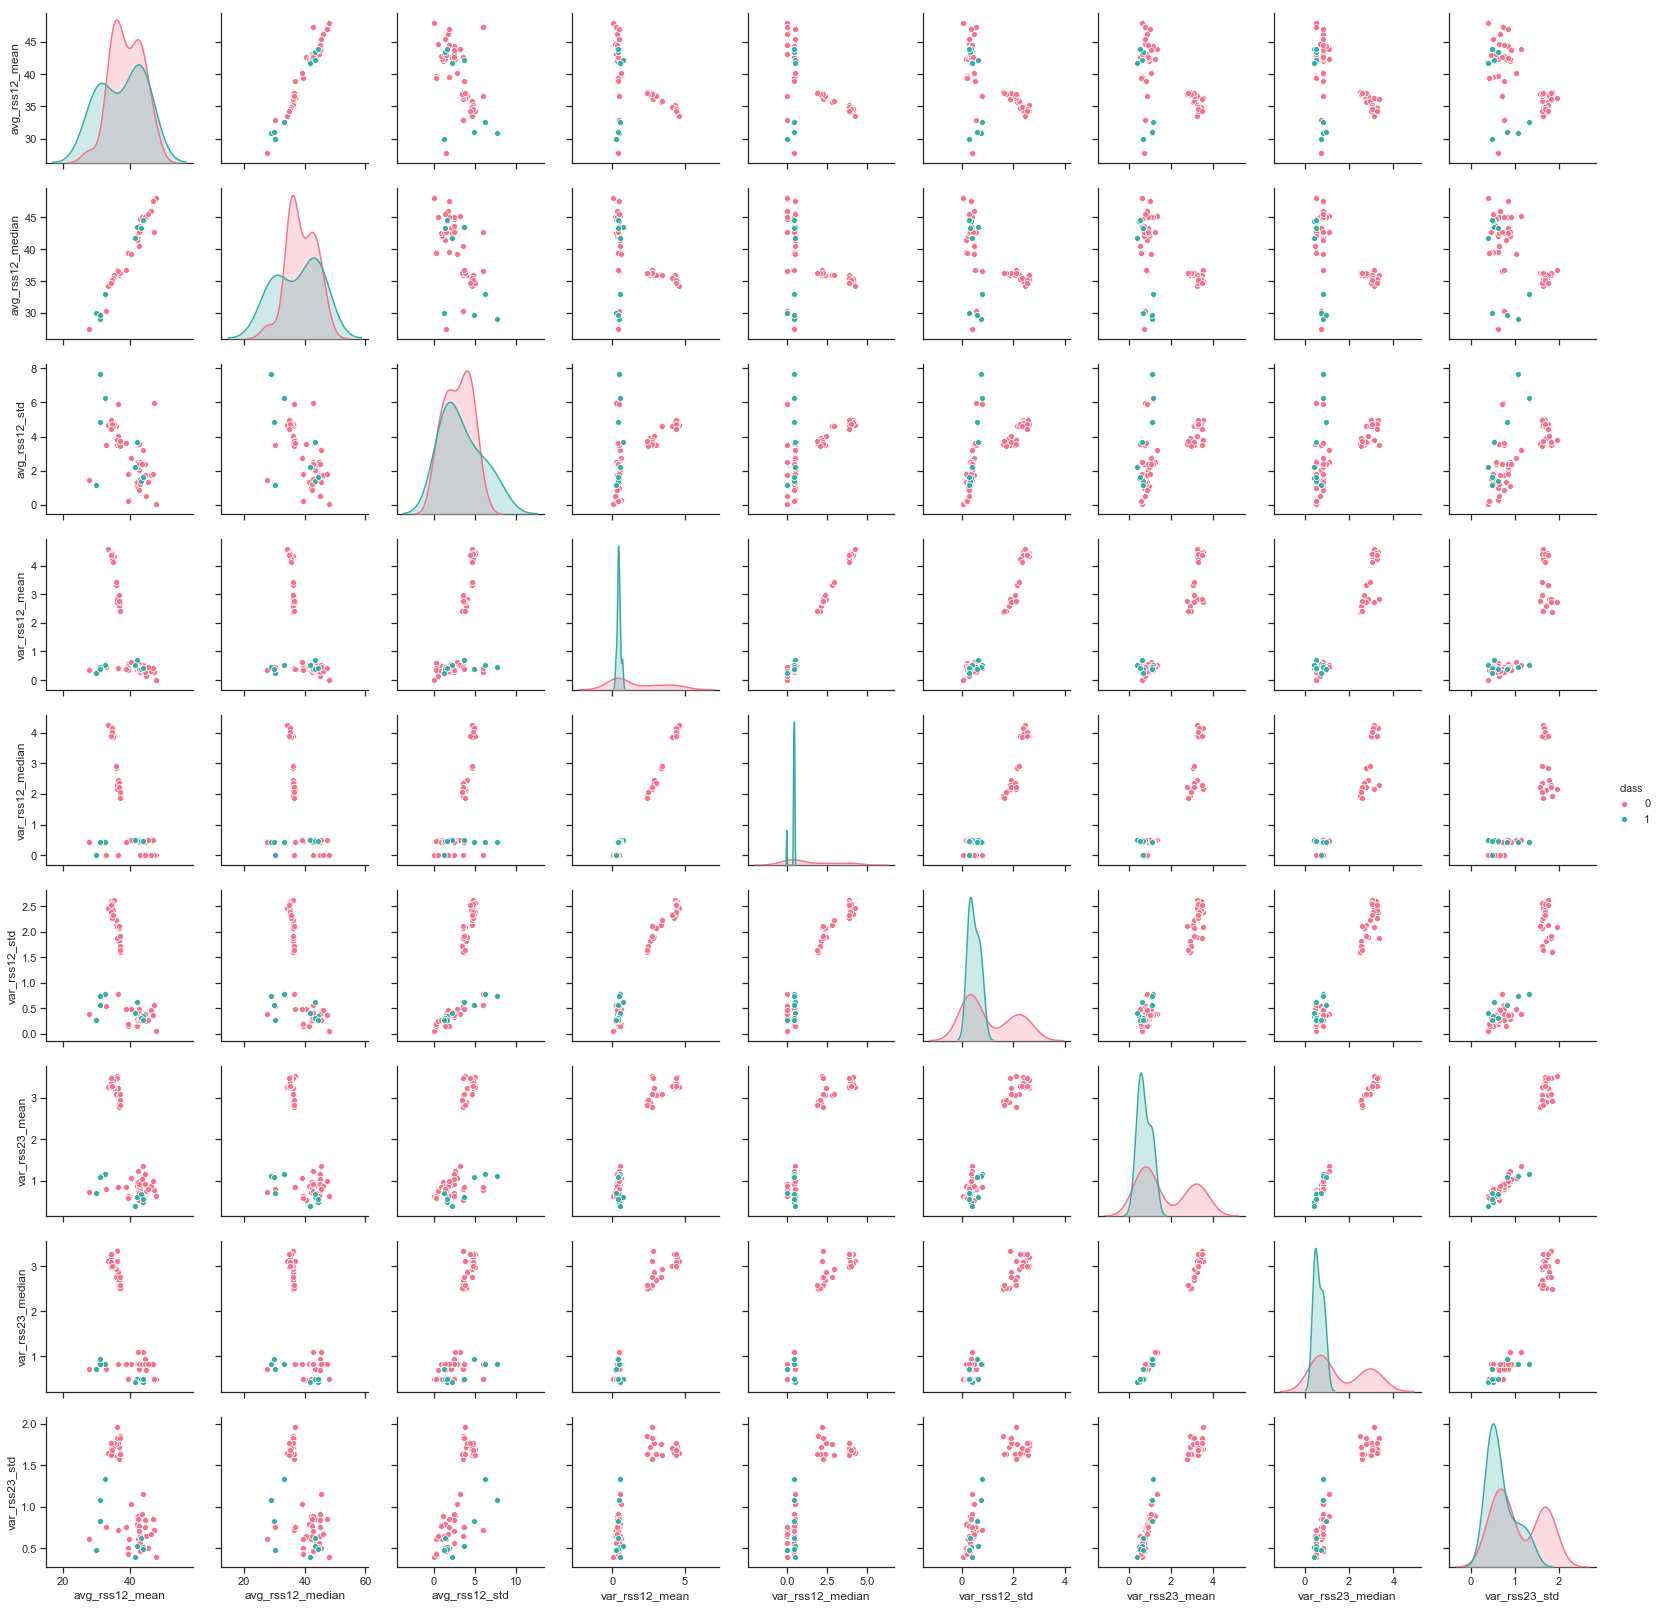

In [51]:
def depict_scatterplot(time_domain_bending_rest):
    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std']
    plt.figure(figsize=(13,13))
    sn.pairplot(time_domain_bending_rest,vars=column,hue="class",diag_kind='kde',palette='husl')
    plt.show()
    
    
print("\nScatter Plot for time domain features for time series 1,2 and 6 and classifiying bending from non-bending")   
depict_scatterplot(time_domain_bending_rest)

<br><br><br>
**QUESTION D(ii)**:<br>
Break each time series in your training set into two (approximately) equal
length time series. Now instead of 6 time series for each of the training
instances, you have 12 time series for each training instance. Repeat the
experiment in 1(d)i, i.e depict scatter plots of the features extracted from both
parts of the time series 1,2, and 12. Do you see any considerable difference
in the results with those of 1(d)i?
<br>

In [52]:
def split_timeseries_into_two(trainfile_paths):
    time_series=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    time_series2=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23',
                  'avg_rss12_2','var_rss12_2','avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2']

    col_part1=['avg_rss12','var_rss12','avg_rss13','var_rss13','avg_rss23','var_rss23']
    col_part2=['avg_rss12_2','var_rss12_2','avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2']

    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std',
            'class']

    time_series1=['avg_rss12','var_rss12','var_rss23']

    feature_row1=[]
    feature_row2=[]

    trainingdata_split = pd.DataFrame(columns=time_series2)


    time_domain_bending_set1 = pd.DataFrame(columns=column)
    time_domain_bending_set2 = pd.DataFrame(columns=column)


    for rowid,paths in enumerate(trainfile_paths):
        df=pd.read_csv(paths)
        df_split1=df.loc[:239,:]
        df_split1=df_split1.drop(["# Columns: time"], axis=1)
        df_split1.columns=col_part1
        df_split2=df.loc[240:,:]
        df_split2=df_split2.drop(["# Columns: time"], axis=1)
        df_split2.columns=col_part2
        df_split2.index = range(240)

        for col in col_part1:
            trainingdata_split[col]=df_split1[col]

        for col in col_part2:
            trainingdata_split[col]=df_split2[col]



    for rowidx,paths in enumerate(trainfile_paths):
        df=pd.read_csv(paths)
        df_split1=df.loc[:239,:]
        df_split1=df_split1.drop(["# Columns: time"], axis=1)
        df_split1.columns=col_part1
        df_split2=df.loc[240:,:]
        df_split2=df_split2.drop(["# Columns: time"], axis=1)
        df_split2.index = range(240)
        df_split2.columns=col_part1

        for col in time_series1:
            ts_mean1=df_split1[col].mean()
            ts_mean2=df_split2[col].mean()
            feature_row1.append(ts_mean1)
            feature_row2.append(ts_mean2)

            ts_median1=df_split1[col].median()
            ts_median2=df_split2[col].median()      
            feature_row1.append(ts_median1)
            feature_row2.append(ts_median2)        

            ts_std1=df_split1[col].std()
            ts_std2=df_split2[col].std()
            feature_row1.append(ts_std1)
            feature_row2.append(ts_std2)

        if(rowidx<9):
            feature_row1.append(1)
            feature_row2.append(1)
        else:
            feature_row1.append(0)
            feature_row2.append(0)

        for colidx,colname in enumerate(column):
            time_domain_bending_set1.at[rowidx,colname]=feature_row1[colidx]
            time_domain_bending_set2.at[rowidx,colname]=feature_row2[colidx]

        feature_row1=[]  
        feature_row2=[] 
    
    
    return trainingdata_split,time_domain_bending_set1,time_domain_bending_set2
    
           
        
trainingdata_split,time_domain_bending_set1,time_domain_bending_set2=split_timeseries_into_two(trainfile_paths)


**Break each time series in your training set into two (approximately) equal
length time series.**

In [53]:
trainingdata_split

,avg_rss12,var_rss12,avg_rss13,var_rss13,avg_rss23,var_rss23,avg_rss12_2,var_rss12_2,avg_rss13_2,var_rss13_2,avg_rss23_2,var_rss23_2
0,32.25,5.76,14.00,4.36,18.00,2.12,37.50,1.50,20.75,0.43,11.00,2.35
1,37.75,5.07,15.50,3.20,14.75,1.79,30.75,6.30,16.50,3.35,14.33,4.78
2,34.50,2.60,20.00,4.74,20.50,2.87,26.25,3.34,19.00,0.71,14.75,1.09
3,23.75,5.36,11.75,6.22,14.25,3.77,37.00,8.92,16.33,5.25,15.33,5.79
4,41.25,3.77,15.00,6.63,11.50,2.69,35.50,5.55,19.75,3.49,21.75,1.30
5,36.75,1.30,13.50,3.35,15.00,2.55,28.00,3.74,17.67,2.87,18.67,7.54
6,37.00,1.22,17.50,4.92,12.50,3.64,43.67,2.62,13.33,1.89,14.50,8.65
7,38.50,7.09,11.50,6.80,16.00,4.74,36.00,5.61,18.25,2.77,18.00,4.24
8,27.50,6.42,16.33,2.62,14.67,3.86,30.75,5.12,16.33,1.89,16.67,4.64
9,26.00,3.61,15.75,2.95,14.25,6.30,35.25,8.32,20.80,1.72,16.00,1.90


**Time Domain Feature tables(mean,median and std)** <br>
**First 6 columns:  'avg_rss12' , 'var_rss12' , 'avg_rss13' , 'var_rss13' , 'avg_rss23' , 'var_rss23'**


In [54]:
time_domain_bending_set1

,avg_rss12_mean,avg_rss12_median,avg_rss12_std,var_rss12_mean,var_rss12_median,var_rss12_std,var_rss23_mean,var_rss23_median,var_rss23_std,class
0,44.0572,44.5,1.55697,0.381042,0.47,0.32954,0.59825,0.5,0.526656,1
1,43.2789,45,3.47335,0.673292,0.485,0.634285,0.640958,0.765,0.554542,1
2,41.6212,42.33,3.11864,0.623083,0.5,0.489595,0.419083,0.43,0.4112,1
3,44.117,45,1.35984,0.250042,0,0.314099,0.815417,0.71,0.718016,1
4,43.4862,43.71,1.28198,0.378667,0.47,0.284434,0.524875,0.47,0.486847,1
5,32.0144,26.125,8.74346,0.587875,0.47,0.936124,1.53804,1.045,1.63912,1
6,30.7124,30.29,0.937965,0.298958,0.43,0.299197,0.725333,0.71,0.599116,1
7,29.1899,27,6.2169,0.497042,0.43,0.731004,1.09979,0.82,1.16116,1
8,34.1106,30.5,5.09723,0.5285,0.47,0.712906,0.99625,0.83,0.813779,1
9,27.3684,27,1.29572,0.308042,0,0.421739,0.669708,0.5,0.61638,0


**Time Domain Feature tables(mean,median and std)** <br>
**Next 6 columns:  'avg_rss12' , 'var_rss12' , 'avg_rss13' , 'var_rss13' , 'avg_rss23' , 'var_rss23'**

In [55]:
time_domain_bending_set2

,avg_rss12_mean,avg_rss12_median,avg_rss12_std,var_rss12_mean,var_rss12_median,var_rss12_std,var_rss23_mean,var_rss23_median,var_rss23_std,class
0,43.8518,43.5,1.55717,0.471458,0.5,0.342346,0.388333,0,0.478528,1
1,41.0808,42,3.53748,0.718792,0.5,0.627915,0.586083,0.47,0.491873,1
2,41.7349,41.5,0.59592,0.448875,0.5,0.27305,0.3475,0.43,0.363144,1
3,42.7929,42.67,1.05879,0.506125,0.5,0.260761,0.543875,0.5,0.473445,1
4,44.452,44.5,1.77125,0.447583,0.5,0.235493,0.58575,0.5,0.487918,1
5,33.158,33,0.941701,0.444375,0,0.603331,0.786042,0.71,0.768408,1
6,29.0515,29,0.635067,0.213917,0,0.24359,0.677917,0.71,0.32221,1
7,32.6863,30,8.5762,0.437292,0.43,0.738184,1.11492,0.87,0.996452,1
8,28.0059,27.585,1.43447,0.282417,0.43,0.323927,1.19996,1,0.838177,1
9,28.0643,28,1.49894,0.419333,0.43,0.358233,0.801083,0.82,0.603417,0


**Scatter Plot for First 6 columns:  'avg_rss12' , 'var_rss12' , 'avg_rss13' , 'var_rss13' , 'avg_rss23' , 'var_rss23',**

<Figure size 936x936 with 0 Axes>

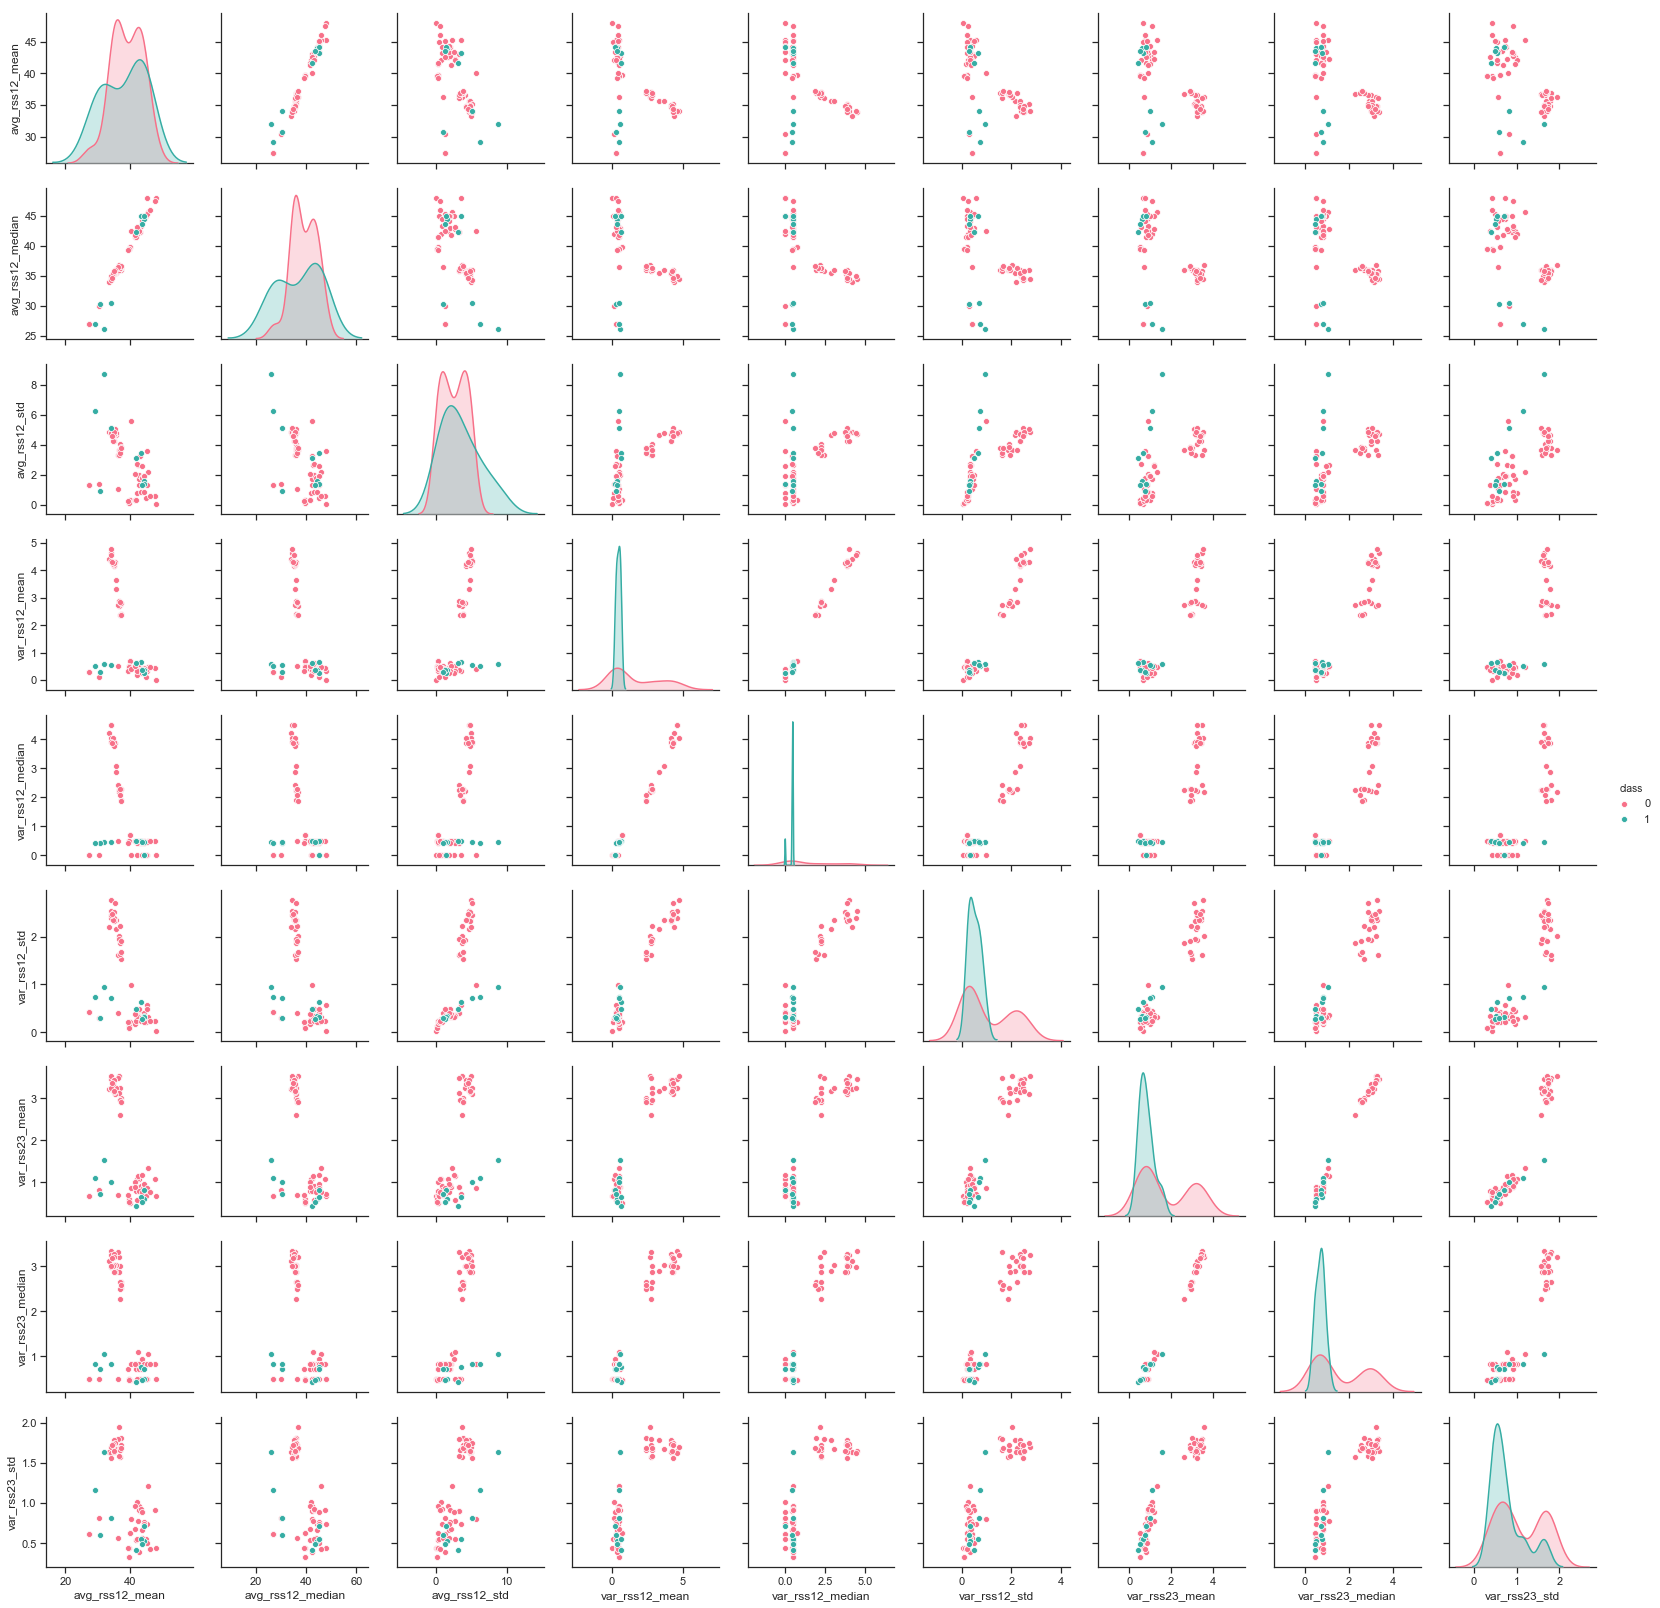

In [56]:
def scatter_plots_for_first6cols(time_domain_bending_set1):
    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std']
    plt.figure(figsize=(13,13))
    sn.pairplot(time_domain_bending_set1,vars=column,hue="class",diag_kind='kde',palette='husl')
    plt.show()
    
scatter_plots_for_first6cols(time_domain_bending_set1)

**Scatter plot for Next 6 columns: 'avg_rss12_2','var_rss12_2' ,'avg_rss13_2','var_rss13_2','avg_rss23_2','var_rss23_2'**

<Figure size 936x936 with 0 Axes>

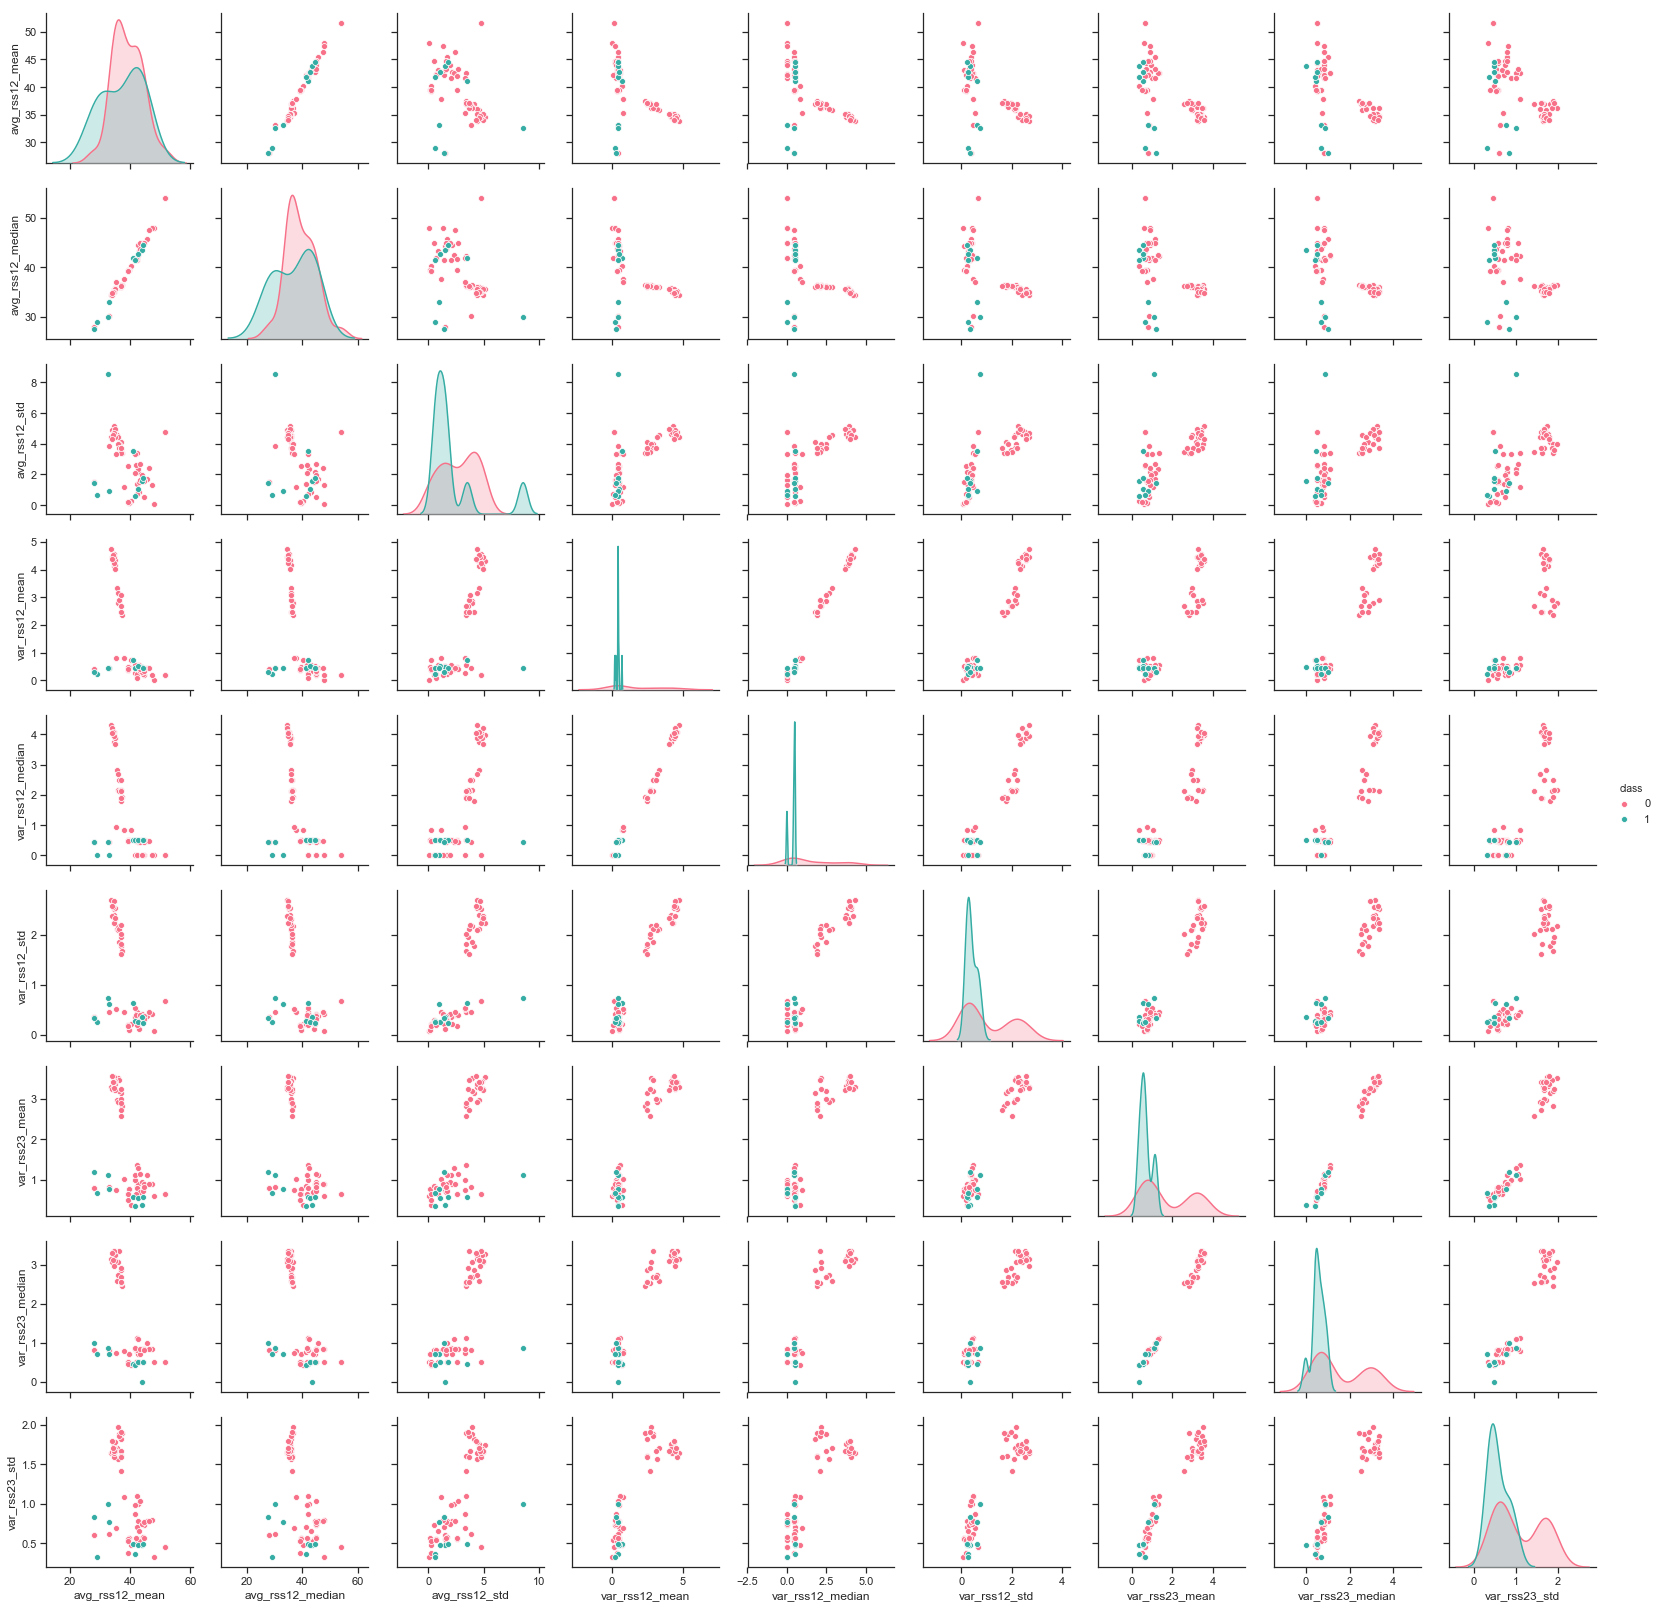

In [57]:
def scatter_plots_for_next6cols(time_domain_bending_set2):
    column=['avg_rss12_mean', 'avg_rss12_median','avg_rss12_std',
            'var_rss12_mean','var_rss12_median','var_rss12_std',
            'var_rss23_mean','var_rss23_median','var_rss23_std']
    plt.figure(figsize=(13,13))
    sn.pairplot(time_domain_bending_set2,vars=column,hue="class",diag_kind='kde',palette='husl')
    plt.show()
    
    
scatter_plots_for_next6cols(time_domain_bending_set2)

**There is only little a difference in the scatter plot before splitting the time series(d(i)) 
and after splitting the time series in d(ii)**

<br><br>
**QUESTION D(iii)** <br>

Break each time series in your training set into l ={1,2,3,4... 20} time series
of approximately equal length and use logistic regression5 to solve the binary
classification problem, using time-domain features. Remember that breaking
each of the time series does not change the number of instances. It only
changes the number of features for each instance. Calculate the p-values for
your logistic regression parameters in each model corresponding to each value
of l and refit a logistic regression model using your pruned set of features.6
Alternatively, you can use backward selection using sklearn.feature selection
or glm in R. Use 5-fold cross-validation to determine the best value of the pair
(l; p), where p is the number of features used in recursive feature elimination.
Explain what the right way and the wrong way are to perform cross-validation
in this problem. Obviously, use the right way! Also, you may encounter the
problem of class imbalance, which may make some of your folds not having
any instances of the rare class. In such a case, you can use stratified cross
validation. Research what it means and use it if needed.
In the following, you can see an example of applying Python’s Recursive
Feature Elimination, which is a backward selection algorithm, to logistic regression.

**splitting each time series from l=1 to 20**

In [58]:
def split_training_binary(l):
    data=dict()
    for i,paths in enumerate(trainfile_paths):
        df=pd.read_csv(paths)
        data[i]=df
    datatrain = {}
    ts_range=np.arange(0,6,1)
    split = int(480 / l);
    for i,path in enumerate(trainfile_paths): 
        values = data[i]
        trainlist = []
        df = pd.DataFrame(values)
        df=df.drop(['# Columns: time'],axis=1)
        begin = 0;
        stop = split
        l_range=np.arange(1,l+1,1)
        for j,x in enumerate(l_range):
            if (split < 481):    
                df=df.loc[begin:stop]
                mindf = df.min()
                maxdf = df.max()
                meandf = df.mean()
                mediandf = df.median()
                stddf = df.std()
                quant25 = df.quantile(0.25)
                quant75 = df.quantile(0.75)
                for y,k in enumerate(ts_range):
                    trainlist.append(mindf[k])
                    trainlist.append(maxdf[k])
                    trainlist.append(meandf[k])
                    trainlist.append(mediandf[k])
                    trainlist.append(stddf[k])
                    trainlist.append(quant25[k])
                    trainlist.append(quant75[k]) 
        begin = stop
        stop = begin + split
        datatrain[i] = trainlist

    datatrain = pd.DataFrame.from_dict(datatrain, orient='index')
    return datatrain

In [59]:
print("\n Sample training split on l=3 \n")
train_feature=split_training_binary(3)
train_feature


 Sample training split on l=3 



,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,38.75,46.50,43.930994,44.50,1.393985,42.75,45.00,0.00,1.50,0.350870,...,1.213515,36.00,37.00,0.00,1.50,0.527391,0.50,0.495939,0.00,1.00
1,35.25,47.75,43.618882,45.00,3.337675,42.75,45.50,0.00,3.00,0.599130,...,1.314473,36.00,37.25,0.00,1.50,0.650373,0.83,0.537789,0.00,1.00
2,33.00,45.00,40.685155,41.50,3.196445,38.00,43.25,0.00,2.18,0.697081,...,2.297140,27.50,30.00,0.00,1.79,0.447764,0.43,0.432562,0.00,0.80
3,41.00,48.00,44.785652,45.00,0.798876,45.00,45.00,0.00,1.30,0.179503,...,2.574098,22.75,25.00,0.00,5.26,0.817205,0.71,0.779185,0.43,1.10
4,40.75,45.00,43.077702,42.80,1.003400,42.00,43.75,0.00,1.12,0.408882,...,4.602947,21.00,28.00,0.00,2.28,0.518944,0.43,0.515339,0.00,0.83
5,21.00,50.00,27.927826,25.33,7.398329,24.25,26.25,0.00,6.50,0.504534,...,6.096019,18.50,28.50,0.00,13.61,1.626584,1.09,1.755745,0.50,2.05
6,30.00,33.00,31.117329,31.25,0.883174,30.25,31.67,0.00,1.00,0.397143,...,2.078381,17.67,19.50,0.00,6.40,0.735528,0.71,0.702545,0.47,0.94
7,25.25,39.25,31.154472,28.00,5.064879,27.00,36.50,0.00,3.67,0.333975,...,3.641668,17.33,20.50,0.00,6.02,0.906832,0.71,0.948027,0.47,1.00
8,25.00,47.50,36.298012,38.25,4.908782,30.50,40.00,0.00,6.38,0.682422,...,7.584459,18.00,28.25,0.00,3.74,0.996584,0.82,0.838246,0.47,1.25
9,24.50,29.75,27.789379,27.25,1.138471,27.00,29.00,0.00,1.48,0.237267,...,1.484580,8.50,10.00,0.00,3.54,0.613292,0.50,0.563663,0.00,0.94


**Applying Logistic Regression on each model-split without prunning**

In [60]:
def logistic_regression_without_prunning():
    l_splits=np.arange(1,21,1)
    max_accuracy_before_prunning=0
    best_l_before_prunning=1
    for i,l in enumerate(l_splits):
        df=split_training_binary(l)
        row=df.shape[0]
        col=df.shape[1]
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        X_train=df.iloc[:,:(col-2)]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        Y_train=df['class']
        logistic_reg=LogisticRegression(dual=False, tol=0.00001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')#use LogisticRegression to predict the value
        logistic_reg_fit=logistic_reg.fit(X_train,Y_train)
        accuracy_per_fold=cross_val_score(logistic_reg, X_train, Y_train,cv=5)
        accuracy_fullmodel=accuracy_per_fold.mean()
        if(accuracy_fullmodel>max_accuracy_before_prunning):
            best_l_before_prunning=l
            max_accuracy_before_prunning=accuracy_fullmodel
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L'],[max_accuracy_before_prunning,best_l_before_prunning]])
    print("\nApplying Logistic Regression with Cross Validation on each model-split without prunning\n",table.draw())
    return best_l_before_prunning,max_accuracy_before_prunning

best_l_before_prunning,max_accuracy_before_prunning=logistic_regression_without_prunning()


Applying Logistic Regression with Cross Validation on each model-split without prunning
 +--------------+--------+
| Max Accuracy | Best L |
+==============+========+
| 0.913        | 1      |
+--------------+--------+


**Finding significant features in the models using Recursive Feature elimination with cross validation on the training set**

In [61]:
def logistic_regression_pvalues(best_l_before_prunning):
    l_score = []
    significant_cols=[]
    df=split_training_binary(best_l_before_prunning)
    names=df.columns
    row=df.shape[0]
    col=df.shape[1]
    class_val=[]
    significant_features=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
            
    df['class']=class_val
    
    X_train=df.iloc[:,:(col-2)]
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    Y_train=df['class']

    logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')#use LogisticRegression to predict the value
    feature_prunning = RFECV(logistic_reg, step = 1, cv = 5).fit(X_train,Y_train)
    support_range=np.arange(0,len(feature_prunning.support_),1)
    ranking_range=np.arange(0,len(feature_prunning.ranking_),1)
    ranking=feature_prunning.ranking_
    print("After using Recursive Feature Elimination we have found that the following features are significant and highly ranked\n")
    for i,supp in enumerate(support_range):
        if feature_prunning.support_[supp] == True:
            print("Significant Feature Index : ",i," Ranking: ",ranking[i])
            significant_features.append(i)
    print("\nTherefore selected features indices are: ",significant_features)
    return significant_features
    
significant_features=logistic_regression_pvalues(best_l_before_prunning)

After using Recursive Feature Elimination we have found that the following features are significant and highly ranked

Significant Feature Index :  28  Ranking:  1
Significant Feature Index :  29  Ranking:  1
Significant Feature Index :  30  Ranking:  1

Therefore selected features indices are:  [28, 29, 30]


**Applying Logistic Regression on each model-split with prunning(using only significant feature's indices which we found above**

In [62]:
def logistic_refitting_significantcols(significant_features):
    l_splits=np.arange(1,21,1)
    max_accuracy_after_prunning=0
    best_l_after_prunning=1
    for i,l in enumerate(l_splits):
        df=split_training_binary(l)
        row=df.shape[0]
        col=df.shape[1]
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        X_train=df.iloc[:,significant_features]
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        Y_train=df['class']
        logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')#use LogisticRegression to predict the value
        logistic_reg_fit=logistic_reg.fit(X_train,Y_train)
        accuracy_per_fold=cross_val_score(logistic_reg, X_train, Y_train,cv=5)
        accuracy_fullmodel=accuracy_per_fold.mean()
        if(accuracy_fullmodel>max_accuracy_after_prunning):
            best_l_after_prunning=l
            max_accuracy_after_prunning=accuracy_fullmodel
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L'],[max_accuracy_after_prunning,best_l_after_prunning]])
    print("\nApplying Logistic Regression with Cross Validation on each model-split with significant features\n",table.draw())
    return best_l_after_prunning,max_accuracy_after_prunning



best_l_after_prunning , max_accuracy_after_prunning = logistic_refitting_significantcols(significant_features)


Applying Logistic Regression with Cross Validation on each model-split with significant features
 +--------------+--------+
| Max Accuracy | Best L |
+==============+========+
| 0.971        | 3      |
+--------------+--------+


**Use 5-fold cross-validation to determine the best value of the pair (l, p), where p is the number of features used in recursive feature elimination.
Some of the folds are not having any instances of the rare class. In such a case, I am using stratified cross validation.**

**The right way of performing cross validation is:**
During cross-validation, we make feature selection a part of our process while training our model. Also,it will only be done on training data
<br>
**The wrong way of performing cross validation is:**
When we  select features using all of our dataset and when it is done independently of cross validation method

<br>

**Finding the Best L,P pair among all significant features using RFECV using Stratified Cross Validation**

In [26]:
def best_lp_pair(significant_features):
    score_after_prunning=[]
    max_accuracy_training=0
    l_splits=np.arange(1,21,1)
    best_l=0
    num_optimal_predictors=0
    for l in l_splits:
        scaler=MinMaxScaler()
        df=split_training_binary(l)
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)

        df['class']=class_val
        col=df.shape[1]
        column=df.columns
        df=scaler.fit_transform(df)
        df=pd.DataFrame(df,columns=column)
        X_train=df.iloc[:,significant_features]
        Y_train=df['class']
        logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
        rfecv = RFECV(estimator=logistic_reg, step=1, cv=StratifiedKFold(5), scoring='accuracy')
        rfecv.fit(X_train, Y_train)
        if(rfecv.score(X_train,Y_train)>max_accuracy_training):
            best_l=l
            num_optimal_predictors=rfecv.n_features_
            max_accuracy_training=rfecv.score(X_train,Y_train)
    print("\n")
    table=Texttable()
    table.add_rows([['Best L','Best P','Max CV Accuracy'],[best_l,num_optimal_predictors,max_accuracy_training]])
    print("best (l,p) pair and  Maximum Cross Validation accuracy: \n",table.draw(),"\n")
    print("Therefore, out of ",len(significant_features)," significant features, we have ",num_optimal_predictors," features which are optimal")
    return best_l,num_optimal_predictors,max_accuracy_training


best_l,num_optimal_predictors,max_accuracy_training=best_lp_pair(significant_features)



best (l,p) pair and  Maximum Cross Validation accuracy: 
 +--------+--------+-----------------+
| Best L | Best P | Max CV Accuracy |
+========+========+=================+
| 1      | 2      | 1               |
+--------+--------+-----------------+ 

Therefore, out of  3  significant features, we have  2  features which are optimal


<br><br>
**Question D(iv):**
<br>
Report the confusion matrix and show the ROC and AUC for your classifier
on train data. Report the parameters of your logistic regression βi’s as well
as the p-values associated with them.


---------  P-values and Coefficients --------------

                 Generalized Linear Model Regression Results                  
Dep. Variable:                  CLASS   No. Observations:                   69
Model:                            GLM   Df Residuals:                       65
Model Family:                Binomial   Df Model:                            3
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3.1070
Date:                Mon, 24 Jun 2019   Deviance:                       6.2140
Time:                        19:54:21   Pearson chi2:                     4.83
No. Iterations:                     5   Covariance Type:             nonrobust
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -27.6582      7.230     -3.825      0.000     -41.829     -13.48

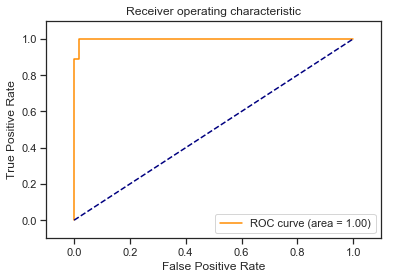

In [69]:
def logit_pvalues_coeff(significant_features,best_l):
    print("\n---------  P-values and Coefficients --------------\n")
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)

    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
    rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv = rfecv.fit(X_train,Y_train)
    traindata = df.iloc[:,significant_features]
    col_names=[]
    colrange=np.arange(0,len(significant_features),1)
    for i,colid in enumerate(colrange):
        col_names.append("feature"+str(colid))

    traindata.columns = col_names
    traindata["CLASS"] = class_val

    formula = 'CLASS ~ feature0 + feature1 + feature2'
    model = smf.glm(formula = formula, data=traindata, family=sm.families.Binomial())
    result= model.fit(maxiter=5)
    
    print(result.summary())
    return result,traindata,Y_train

    
def confusionMatrix(best_l,significant_features,result,traindata,Y_train):
    print("\n\n---------  Confusion Matrix --------------\n")
    print("\nThe confusion matrix of training dataset for best l = ",best_l,"\n")
    Y_pred = result.predict(traindata)
    cm = confusion_matrix(Y_train,Y_pred>0.5)
    TP = cm[1][1]
    FP = cm[0][1]
    TN = cm[0][0]
    FN = cm[1][0]
    print(cm)
    print("\n")
    print("TRUE POSITIVE: ",TP,"\n")
    print("FALSE POSITIVE: ",FP,"\n")
    print("TRUE NEGATIVE: ",TN,"\n")
    print("FALSE NEGATIVE: ",FN,"\n")
    return Y_pred


def roc_auc(Y_pred,best_l,significant_features):
    print("\n\n---------  ROC CURVE --------------\n")
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)

    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
    rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv = rfecv.fit(X_train,Y_train)
    
    fpr, tpr, thresholds = roc_curve(Y_train,Y_pred)
    print("\nThe ROC curve for l = ",best_l," is as follows, and the AUC = %.2f"% auc(fpr,tpr))
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

    
result,traindata,Y_train=logit_pvalues_coeff(significant_features,best_l_after_prunning)
Y_pred=confusionMatrix(best_l_after_prunning,significant_features,result,traindata,Y_train)
roc_auc(Y_pred,best_l_after_prunning,significant_features)

<br><br>
**QUESTION D(v):**
<br>
Test the classifier on the test set. Remember to break the time series in
your test set into the same number of time series into which you broke your
training set. Remember that the classifier has to be tested using the features
extracted from the test set. Compare the accuracy on the test set with the
cross-validation accuracy you obtained previously

**Splitting testing data for each l=1 to 20**

In [70]:
def split_testing_binary(l):
    data=dict()
    for i,paths in enumerate(testfile_paths):
        df=pd.read_csv(paths)
        data[i]=df
    datatest = {}
    ts_range=np.arange(0,6,1)
    split = int(480 / l);
    for i,path in enumerate(testfile_paths): 
        values = data[i]
        testlist = []
        df = pd.DataFrame(values)
        df=df.drop(['# Columns: time'],axis=1)
        begin = 0
        stop = split
        l_range=np.arange(1,l+1,1)
        for j,x in enumerate(l_range):
            if (split < 481):    
                df=df.loc[begin:stop]
                mindf = df.min()
                maxdf = df.max()
                meandf = df.mean()
                mediandf = df.median()
                stddf = df.std()
                quant25 = df.quantile(0.25)
                quant75 = df.quantile(0.75)
                for y,k in enumerate(ts_range):
                    testlist.append(mindf[k])
                    testlist.append(maxdf[k])
                    testlist.append(meandf[k])
                    testlist.append(mediandf[k])
                    testlist.append(stddf[k])
                    testlist.append(quant25[k])
                    testlist.append(quant75[k]) 
        begin = stop
        stop = begin + split
        datatest[i] = testlist

    datatest = pd.DataFrame.from_dict(datatest, orient='index')
    return datatest

In [71]:
print("Sample splitting on testing data for l=3\n")
test_feature=split_testing_binary(3)
test_feature

Sample splitting on testing data for l=3



,0,1,2,3,4,5,6,7,8,9,...,116,117,118,119,120,121,122,123,124,125
0,38.75,42.33,41.346335,42.00,0.973190,41.00,42.00,0.00,1.22,0.257205,...,1.091037,33.00,35.00,0.00,1.50,0.655528,0.43,0.647466,0.00,1.30
1,41.75,44.25,42.916025,43.00,0.614426,42.33,43.50,0.00,0.94,0.465528,...,1.352906,33.00,34.50,0.00,1.50,0.502547,0.00,0.589114,0.00,1.30
2,12.75,27.00,22.637205,23.75,3.105327,21.00,24.33,0.00,6.76,0.865776,...,1.743872,25.25,27.00,0.00,2.64,0.535652,0.50,0.429715,0.43,0.83
3,26.50,30.00,28.800373,29.25,1.171534,27.67,30.00,0.00,0.94,0.210311,...,2.058605,15.75,18.75,0.00,4.03,0.858261,0.83,0.546261,0.47,1.12
4,24.50,29.75,27.789379,27.25,1.138471,27.00,29.00,0.00,1.48,0.237267,...,1.484230,8.50,10.00,0.00,3.54,0.609938,0.50,0.565705,0.00,0.94
5,24.75,48.25,36.612733,30.00,9.023805,29.00,48.00,0.00,3.11,0.290062,...,3.137588,5.00,10.50,0.00,3.91,0.957267,0.82,0.800504,0.47,1.22
6,48.00,48.00,48.000000,48.00,0.000000,48.00,48.00,0.00,0.00,0.000000,...,1.870557,2.00,5.00,0.00,2.28,0.697453,0.71,0.414468,0.47,0.94
7,29.33,44.50,36.791366,36.00,3.711127,34.00,39.75,0.00,8.18,2.474099,...,3.178640,16.75,21.50,0.00,8.26,2.965776,2.59,1.710454,1.79,3.91
8,29.25,44.00,37.507702,37.00,3.051180,35.25,39.50,0.00,8.95,2.151180,...,2.971394,16.75,21.00,0.43,8.57,2.909503,2.83,1.779016,1.41,4.03
9,28.50,44.67,38.017826,36.75,3.451375,35.75,41.33,0.00,12.99,1.995342,...,2.677956,18.67,21.75,0.00,7.87,2.492360,2.12,1.622579,1.30,3.30


**Applying Logistic Regression on the testing data**

In [72]:
def logistic_regression_testing():
    score=[]
    l_splits=np.arange(1,21,1)
    max_accuracy_test=0
    best_l_before_prunning=1
    for i,l in enumerate(l_splits):
        df=split_testing_binary(l)
        row=df.shape[0]
        col=df.shape[1]
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<4:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        X_test=df.iloc[:,:(col-2)]
        scaler = StandardScaler()
        X_test = scaler.fit_transform(X_test)
        Y_test=df['class']
        logistic_reg=LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')#use LogisticRegression to predict the value
        logistic_reg_fit=logistic_reg.fit(X_test,Y_test)
        accuracy_per_fold=cross_val_score(logistic_reg, X_test, Y_test,cv=4)
        accuracy_fullmodel=accuracy_per_fold.mean()
        if(accuracy_fullmodel>max_accuracy_test):
            score.append(accuracy_fullmodel)
            best_l_before_prunning=l
            max_accuracy_test=accuracy_fullmodel
    table=Texttable()
    table.add_rows([['Max Accuracy','Best L'],[max_accuracy_test,best_l_before_prunning]])
    print("\nApplying Logistic Regression with Cross Validation on each model-split without prunning\n",table.draw())
    
    print("\nTherefore the training and testing crossvalidation accuracy are: \n")
    print("Training accuracy: ",max_accuracy_after_prunning)
    print("Testing accuracy: ",max_accuracy_test)
    return best_l_before_prunning,max_accuracy_test

best_l_before_prunning,max_accuracy_testing=logistic_regression_testing()


Applying Logistic Regression with Cross Validation on each model-split without prunning
 +--------------+--------+
| Max Accuracy | Best L |
+==============+========+
| 0.950        | 1      |
+--------------+--------+

Therefore the training and testing crossvalidation accuracy are: 

Training accuracy:  0.9714285714285715
Testing accuracy:  0.95


<br><br>

**QUESTION (D)(vi)**
<br>
Do your classes seem to be well-separated to cause instability in calculating
logistic regression parameters?

**(Ans)** <br>
Yes, the classes are well separated and the model is very unstable. 
Also, the plot below gives evidence that classes are well separated and the data is imbalanced with few labels of
bending activites and majority labels of non bending activites.

<Figure size 936x936 with 0 Axes>

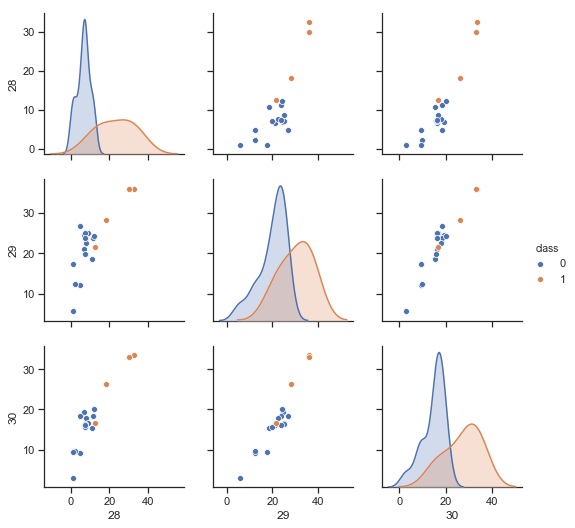

In [73]:
test_data=split_testing_binary(5)
class_val=[]
for i,val in enumerate(test_data.iterrows()):
    if i<4:
        class_val.append(1)
    else:
        class_val.append(0)
test_data['class']=class_val
column=significant_features
selected_data=test_data[column]
selected_data['class']=class_val
plt.figure(figsize=(13,13))
sn.pairplot(data=selected_data,vars=column,hue='class')

<br><br>
**QUESTION D(vii)** <br>
From the confusion matrices you obtained, do you see imbalanced classes?
If yes, build a logistic regression model based on case-control sampling and
adjust its parameters. Report the confusion matrix, ROC, and AUC of the
model.



--------- Case Control Sampling--------------

Resampled dataset shape Counter({1: 60, 0: 60})


---------  Confusion Matrix --------------

[[15  0]
 [ 0  4]]


TP:  4 

FP:  0 

TN:  15 

FN:  0 



---------  ROC CURVE --------------


The ROC curve is as follows, and the AUC = 0.81


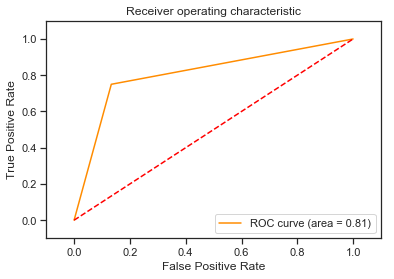

In [76]:
import warnings
warnings.filterwarnings('ignore')
def case_sampling(significant_features,best_l):
    print("\n\n--------- Case Control Sampling--------------\n")
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)

    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    sm = SMOTE(random_state=42)
    X_res, Y_res = sm.fit_sample(X_train,Y_train)
    X_res_train = pd.DataFrame(X_res)
    Y_res_train = pd.DataFrame(Y_res)
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
    rfecv = RFECV(estimator=logistic, step=1, cv=StratifiedKFold(5), scoring='accuracy')
    rfecv = rfecv.fit(X_res_train,Y_res_train)  
    logistic=logistic.fit(X_res_train.iloc[:,significant_features],Y_res_train)
    Y_predict=logistic.predict(X_res_train.iloc[:,significant_features])
    print("Resampled dataset shape %s" % Counter(Y_res)) 
    return Y_res_train,Y_predict


    
def confusionMatrix(Y_train,Y_predict,best_l):
    print("\n\n---------  Confusion Matrix --------------\n")
    
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    
    class_val=[]
    for i,val in enumerate(df1.iterrows()):
        if i<4:
            class_val.append(1)
        else:
            class_val.append(0)
    df1['class']=class_val
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
    logistic=logistic.fit(X_train,Y_train)
    Y_predict=logistic.predict(X_test)
    
    cm = confusion_matrix(Y_test,Y_predict>0.5)
    TP = cm[1][1]
    FP = cm[0][1]
    TN = cm[0][0]
    FN = cm[1][0]
    print(cm)
    print("\n")
    print("TP: ",TP,"\n")
    print("FP: ",FP,"\n")
    print("TN: ",TN,"\n")
    print("FN: ",FN,"\n")


    
def roc_auc(Y_pred,best_l,significant_features):
    print("\n\n---------  ROC CURVE --------------\n")
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    
    class_val=[]
    for i,val in enumerate(df1.iterrows()):
        if i<4:
            class_val.append(1)
        else:
            class_val.append(0)
    df1['class']=class_val
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    sm = SMOTE(random_state=42)
    X_res, Y_res = sm.fit_sample(X_train.iloc[:,significant_features],Y_train)
    X_res_train = pd.DataFrame(X_res)
    Y_res_train = pd.DataFrame(Y_res)
    logistic= LogisticRegression(dual=False, tol=0.0001, C=1e9, fit_intercept=True,random_state=None,solver='newton-cg')
    logistic=logistic.fit(X_res_train,Y_res_train)
    Y_predict=logistic.predict(X_test.iloc[:,significant_features])
    

    fpr, tpr, thresholds = roc_curve(Y_test, Y_predict)
    print("\nThe ROC curve is as follows, and the AUC = %.2f"% auc(fpr,tpr))
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % auc(fpr,tpr))
    plt.plot([0, 1], [0, 1], color='red',  linestyle='--')
    plt.xlim([-0.1, 1.1])
    plt.ylim([-0.1, 1.1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()


Y_train,Y_predict=case_sampling(significant_features,best_l_after_prunning)
confusionMatrix(Y_train,Y_predict,best_l_after_prunning)
roc_auc(Y_pred,best_l_after_prunning,significant_features)

<br><br>
<br><br>
### (E): Binary Classification Using L1-Penalized Logistic Regression
<br>

**QUESTION E(i):** <br>
Repeat 1(d)iii using L1-penalized logistic regression, i.e. instead of using pvalues for variable selection, use L1 regularization. Note that in this problem, you have to cross-validate for both l, the number of time series into which you break each of your instances, and λ, the weight of L1 penalty in your logistic regression objective function (or C, the budget). Packages usually perform cross-validation for λ automatically.

In [77]:
def logistic_l1penalty():
    maxaccuracy_for_objective_func=0
    best_objective_function=0.1
    l_splits=np.arange(1,21,1)
    best_l=1
    for l in l_splits:
        df = split_training_binary(l)
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)

        df['class']=class_val
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        c_range=np.arange(10, 101, 10)
        for i,c in enumerate(c_range):
            c=c/1000 ##Objective Function
            L1_Penalty_Logistic=LogisticRegression(C=c,random_state=None,solver='liblinear')
            L1_Penalty_Logistic.fit(X_train,Y_train)
            cross_validation_result=cross_val_score(L1_Penalty_Logistic,X_train,Y_train,cv=5)
            cross_validation_accuracy=cross_validation_result.mean()
            if(cross_validation_accuracy>maxaccuracy_for_objective_func):
                maxaccuracy_for_objective_func=cross_validation_accuracy
                best_objective_function=c
                best_l=l
    table=Texttable()
    table.add_rows([['Max Accuracy','Best C(Objective Function)','Best L'],[maxaccuracy_for_objective_func,best_objective_function,best_l]])
    print("\nApplying Logistic Regression with L1 Penalty and  with Cross Validation on each model-split\n",table.draw())
    return maxaccuracy_for_objective_func


maxaccuracy_for_objective_func=logistic_l1penalty()


Applying Logistic Regression with L1 Penalty and  with Cross Validation on each model-split
 +--------------+----------------------------+--------+
| Max Accuracy | Best C(Objective Function) | Best L |
+==============+============================+========+
| 0.986        | 0.030                      | 1      |
+--------------+----------------------------+--------+


<br><br>
**QUESTION E(ii)**
<br>
Compare the L1-penalized with variable selection using p-values. Which one
performs better? Which one is easier to implement?

In [81]:
print("(Without Regularization) Max accuracy using p-values(RFECV with Stratified CV): ",max_accuracy_after_prunning)
print("\n(With Regularization) Max accuracy using L1-penalty in Logistic Regression: ",maxaccuracy_for_objective_func)
print("\nL1-penalty with variable selection is easier to implement")

(Without Regularization) Max accuracy using p-values(RFECV with Stratified CV):  0.9714285714285715

(With Regularization) Max accuracy using L1-penalty in Logistic Regression:  0.9857142857142858

L1-penalty with variable selection is easier to implement


<br><br>
<br>
### (F) Multi-class Classification (The Realistic Case) 
<br>

**QUESTION F(i):**
<br>
Find the best l in the same way as you found it in 1(e)i to build an L1- penalized multinomial regression model to classify all activities in your training set.10 Report your test error. Research how confusion matrices and ROC curves are defined for multiclass classification and show them for this problem if possible
<br>

**Applying Logistic Regression for multilabelled training data using regularization with (L1 Penalty)**

In [82]:
def logistic_l1penalty_multilabel():
    maxaccuracy_for_objective_func_multilabel=0
    best_objective_function=0.1
    l_splits=np.arange(1,21,1)
    best_l=1
    for l in l_splits:
        df = split_training_binary(l)
        for i,files in enumerate(trainfile_paths):
            if(files[5:13]=='bending1' or files[5:13]=='bending2'):
                df.at[i,'class']=1
            if(files[5:9]=='lyin'):
                df.at[i,'class']=2
            if(files[5:9]=='cycl'):
                df.at[i,'class']=3
            if(files[5:9]=='sitt'):
                df.at[i,'class']=4
            if(files[5:9]=='stan'):
                df.at[i,'class']=5
            if(files[5:9]=='walk'):
                df.at[i,'class']=6
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        c_range=np.arange(10, 101, 10)
        for i,c in enumerate(c_range):
            c=c/1000 ##Objective Function
            L1_Penalty_Logistic=LogisticRegression(C=c,random_state=None,penalty='l1',solver='saga',multi_class="multinomial")
            L1_Penalty_Logistic.fit(X_train,Y_train)
            cross_validation_result=cross_val_score(L1_Penalty_Logistic,X_train,Y_train,cv=5)
            cross_validation_accuracy=cross_validation_result.mean()
            if(cross_validation_accuracy>maxaccuracy_for_objective_func_multilabel):
                maxaccuracy_for_objective_func_multilabel=cross_validation_accuracy
                best_objective_function=c
                best_l=l
    table=Texttable()
    table.add_rows([['Max Accuracy','Best C(Objective Function)','Best L'],[maxaccuracy_for_objective_func_multilabel,best_objective_function,best_l]])
    print("\nApplying Logistic Regression for Multilabeled data with L1 Penalty and  with Cross Validation on each model-split\n",table.draw())
    return best_l,maxaccuracy_for_objective_func_multilabel,best_objective_function


best_l_multilabel_logistic,maxaccuracy_for_objective_func_multilabel_training,best_objective_function=logistic_l1penalty_multilabel()


Applying Logistic Regression for Multilabeled data with L1 Penalty and  with Cross Validation on each model-split
 +--------------+----------------------------+--------+
| Max Accuracy | Best C(Objective Function) | Best L |
+==============+============================+========+
| 0.875        | 0.100                      | 5      |
+--------------+----------------------------+--------+


**Finding Test error on Multilabelled data using Logistic Regression with Regularization (L1-penalty)**

In [83]:
def logistic_l1penalty_multilabel_testing(best_l,best_objective_function):
    maxaccuracy_multilabel_testing=0
    best_objective_function=0.1
    df = split_testing_binary(best_l)
    for i,files in enumerate(testfile_paths):
        if(files[5:13]=='bending1' or files[5:13]=='bending2'):
            df.at[i,'class']=1
        if(files[5:9]=='lyin'):
            df.at[i,'class']=2
        if(files[5:9]=='cycl'):
            df.at[i,'class']=3
        if(files[5:9]=='sitt'):
            df.at[i,'class']=4
        if(files[5:9]=='stan'):
            df.at[i,'class']=5
        if(files[5:9]=='walk'):
            df.at[i,'class']=6
    col=df.shape[1]
    X_test = df.iloc[:,:(col-2)]
    Y_test = df.loc[:,'class']
    L1_Penalty_Logistic=LogisticRegression(C=best_objective_function,random_state=None,penalty='l1',solver='saga',multi_class="multinomial")
    L1_Penalty_Logistic=L1_Penalty_Logistic.fit(X_test,Y_test)
    Y_predict=L1_Penalty_Logistic.predict(X_test)
    cross_validation_result=cross_val_score(L1_Penalty_Logistic,X_test,Y_test,cv=4)
    cross_validation_accuracy=cross_validation_result.mean()
    maxaccuracy_multilabel_testing=cross_validation_accuracy
    table=Texttable()
    table.add_rows([['Max Accuracy','Best C(Objective Function)','Best L'],[maxaccuracy_multilabel_testing,best_objective_function,best_l]])
    print("\nApplying Logistic Regression for Multilabelled data L1 Penalty and  with Cross Validation on test data for best l\n",table.draw())
    print("\nTest error: ",1-maxaccuracy_multilabel_testing)
    return best_l,maxaccuracy_multilabel_testing,Y_predict,Y_test,X_test


best_l,maxaccuracy_for_objective_func_multilabel,Y_predict,Y_test,X_test= logistic_l1penalty_multilabel_testing(best_l_multilabel_logistic,best_objective_function)


Applying Logistic Regression for Multilabelled data L1 Penalty and  with Cross Validation on test data for best l
 +--------------+----------------------------+--------+
| Max Accuracy | Best C(Objective Function) | Best L |
+==============+============================+========+
| 0.625        | 0.100                      | 5      |
+--------------+----------------------------+--------+

Test error:  0.375


**Finding Confusion matrix and Plotted Roc,Auc for multilabelled data**


Confusion Matrix for Multilabel Logistic Regression: 

[[3 0 0 0 0 0]
 [0 3 0 0 0 0]
 [0 0 3 0 0 0]
 [1 0 0 1 1 0]
 [0 0 0 2 2 0]
 [0 0 0 0 0 3]]


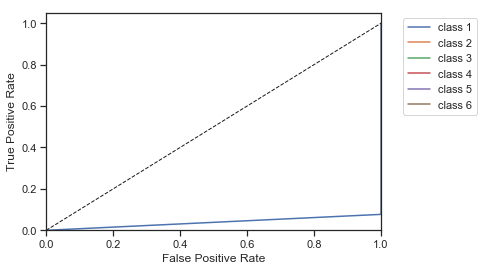

In [90]:
def confusion_matrix_logistic_multilabel(best_l,c,Y_predict,Y_test):
    print("\nConfusion Matrix for Multilabel Logistic Regression: \n")
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)

    for i,files in enumerate(trainfile_paths):
        if(files[5:13]=='bending1' or files[5:13]=='bending2'):
            df.at[i,'class']=1
        if(files[5:9]=='lyin'):
            df.at[i,'class']=2
        if(files[5:9]=='cycl'):
            df.at[i,'class']=3
        if(files[5:9]=='sitt'):
            df.at[i,'class']=4
        if(files[5:9]=='stan'):
            df.at[i,'class']=5
        if(files[5:9]=='walk'):
            df.at[i,'class']=6
    col=df.shape[1]
    
    for i,files in enumerate(testfile_paths):
        if(files[5:13]=='bending1' or files[5:13]=='bending2'):
            df1.at[i,'class']=1
        if(files[5:9]=='lyin'):
            df1.at[i,'class']=2
        if(files[5:9]=='cycl'):
            df1.at[i,'class']=3
        if(files[5:9]=='sitt'):
            df1.at[i,'class']=4
        if(files[5:9]=='stan'):
            df1.at[i,'class']=5
        if(files[5:9]=='walk'):
            df1.at[i,'class']=6
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    L1_Penalty_Logistic=LogisticRegression(C=c,random_state=None,penalty='l1',solver='saga',multi_class="multinomial")
    L1_Penalty_Logistic.fit(X_train,Y_train)
    Y_predict=L1_Penalty_Logistic.predict(X_test)
    
    cm=confusion_matrix(Y_predict,Y_test)  
    print(cm)


def ruc_auc_multilabel_logistic(Y_predict,Y_test,best_l,X_test):
    df = split_training_binary(best_l)
    class_label=[]
    for i,files in enumerate(trainfile_paths):
        if(files[5:13]=='bending1' or files[5:13]=='bending2'):
            class_label.append(1)
        if(files[5:9]=='lyin'):
            class_label.append(2)
        if(files[5:9]=='cycl'):
            class_label.append(3)
        if(files[5:9]=='sitt'):
            class_label.append(4)
        if(files[5:9]=='stan'):
            class_label.append(5)
        if(files[5:9]=='walk'):
            class_label.append(6)
    X_train, X_test, Y_train, Y_test = train_test_split(df, class_label, test_size=.2,random_state=0)
    Logistic = LogisticRegression(C=0.4,random_state=None,penalty='l1',solver='saga',multi_class='multinomial')
    Logistic = Logistic.fit(X_train,Y_train)
    Y_predict=Logistic.predict(X_test)
    Y_predict = label_binarize(Y_predict, classes=[1,2,3,4,5,6])
    Y_test = label_binarize(Y_test, classes=[1,2,3,4,5,6])
    fp_rate=dict()
    tp_rate=dict()
    R_Auc=dict()
    class_range=np.arange(0,6,1)
    for j,i in enumerate(class_range):
        fp_rate[i], tp_rate[i], threshold= roc_curve(Y_test[:,i], Y_predict[:, i],pos_label=i)
        R_Auc[i] = auc(fp_rate[i], tp_rate[i])
    plt.figure()
    for i in class_range:
        plt.plot(fp_rate[i],tp_rate[i],label='class %i'%(i+1)%R_Auc[i])
    plt.plot([0, 1], [0, 1], 'k--',lw=1)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=2,bbox_to_anchor=(1.05,1.0))
    plt.show()
    
    
confusion_matrix_logistic_multilabel(best_l_multilabel_logistic,maxaccuracy_for_objective_func_multilabel_training,Y_predict,Y_test)
ruc_auc_multilabel_logistic(Y_predict,Y_test,best_l_multilabel_logistic,X_test)

<br><br>
**QUESTION F(ii)**:
<br>
Repeat 1(f)i using a Na¨ıve Bayes’ classifier. Use both Gaussian and Multinomial priors and compare the results.

**Naive Bayes using MultiNomial Distribution**

In [85]:
def naive_bayes_multinomial():
    bestscore_multinomial=0
    best_l_NB1=1
    maxNB1_accuracy=0
    for l in range(1,21):
        df = split_training_binary(l)
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        NB_model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
        result = NB_model1.fit(X_train,Y_train)
        scoresMultinomial=result.score(X_train,Y_train)
        NB_model1_cv_result=cross_val_score(NB_model1,X_train,Y_train,cv=5)
        NB_model1_cv_accuracy=NB_model1_cv_result.mean()
        if(NB_model1_cv_accuracy>maxNB1_accuracy):
            maxNB1_accuracy=NB_model1_cv_accuracy
        if(scoresMultinomial>bestscore_multinomial):
            best_l_NB1=l
            bestscore_multinomial=scoresMultinomial
    table=Texttable()
    table.add_rows([['Training Accuracy','Cross Validation Accuracy'],[bestscore_multinomial,maxNB1_accuracy]])
    print("Training and Cross Validation Accuracy in naive Bayes using Multinomial Distribution: \n",table.draw())
    return bestscore_multinomial,best_l_NB1,maxNB1_accuracy

bestscore_multinomial,best_l_nb1,maxNB1_accuracy=naive_bayes_multinomial()

Training and Cross Validation Accuracy in naive Bayes using Multinomial Distribution: 
 +-------------------+---------------------------+
| Training Accuracy | Cross Validation Accuracy |
+===================+===========================+
| 0.957             | 0.929                     |
+-------------------+---------------------------+


**Confusion Matrix for Naive Bayes using Multinomial Distribution**

In [86]:
def confusion_matrix_MultinomialNB(best_l):
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    
    class_val=[]
    for i,val in enumerate(df1.iterrows()):
        if i<4:
            class_val.append(1)
        else:
            class_val.append(0)
    df1['class']=class_val
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    NB_Model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    result_MultinomialNB = NB_Model1.fit(X_train,Y_train)
    Y_predict=result_MultinomialNB.predict(X_test)
    cm=confusion_matrix(Y_predict,Y_test)  
    print("Confusion Matrix for Naive Bayes using MultinNomial Distribution")
    print(cm)

    
def roc_curve_MultinomialNB(best_l):
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    NB_Model1 = MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
    result_MultinomialNB = NB_Model1.fit(X_train,Y_train)
    Y_predict=result_MultinomialNB.predict(X_train)
    cm=confusion_matrix(Y_predict,Y_train)
    limit=np.arange(0,6,1)
    Y_scores=result_MultinomialNB.predict_proba(X_train)
    fp_rate=dict()
    tp_rate=dict()
    R_Auc=dict()
    for i,j in enumerate(limit):
        fp_rate[j], tp_rate[j], _= roc_curve(Y_train, Y_scores[:, j],pos_label=j)
        R_Auc[j] = auc(fp_rate[j], tp_rate[j])
    plt.figure()
    for j,i in enumerate(class_range):
        plt.plot(fp_rate[i],tp_rate[i],label='class %i'%(i+1)%R_Auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.01, 1.0])
    plt.ylim([0.01, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=2,bbox_to_anchor=(1.05,1.0))
    plt.show()
    
    
confusion_matrix_MultinomialNB(best_l_nb1)
# roc_curve_MultinomialNB(best_l_nb1)

Confusion Matrix for Naive Bayes using MultinNomial Distribution
[[15  0]
 [ 0  4]]


<br>

**Naive Bayes using Gaussian Distribution**

In [87]:
def naive_bayes_gaussian():
    maxNB2_accuracy=0
    bestscore_gaussian=0
    best_l_NB2=1
    for l in range(1,21):
        df = split_training_binary(l)
        class_val=[]
        for i,val in enumerate(df.iterrows()):
            if i<9:
                class_val.append(1)
            else:
                class_val.append(0)
        df['class']=class_val
        col=df.shape[1]
        X_train = df.iloc[:,:(col-2)]
        Y_train = df.loc[:,'class']
        NB_model2 = GaussianNB()
        result = NB_model2.fit(X_train,Y_train)
        scoresGaussian=result.score(X_train,Y_train)
        NB_model2_cv_result=cross_val_score(NB_model2,X_train,Y_train,cv=5)
        NB_model2_cv_accuracy=NB_model2_cv_result.mean()
        if(NB_model2_cv_accuracy>maxNB2_accuracy):
            maxNB2_accuracy=NB_model2_cv_accuracy
        if(scoresGaussian>bestscore_gaussian):
            best_l_NB2=l
            bestscore_gaussian=scoresGaussian
    table=Texttable()
    table.add_rows([['Training Accuracy','Cross Validation Accuracy'],[bestscore_gaussian,maxNB2_accuracy]])
    print("\nTraining and Cross Validation Accuracy in naive Bayes using Multinomial Distribution: \n",table.draw())
    return bestscore_gaussian,best_l_NB2,maxNB2_accuracy

bestscore_gaussian , best_l_nb2,maxNB2_accuracy = naive_bayes_gaussian()


Training and Cross Validation Accuracy in naive Bayes using Multinomial Distribution: 
 +-------------------+---------------------------+
| Training Accuracy | Cross Validation Accuracy |
+===================+===========================+
| 0.638             | 0.771                     |
+-------------------+---------------------------+


**Confusion Matrix for Naive Bayes using Gaussian Distribution**

In [88]:
def confusion_matrix_GaussianNB(best_l):
    df = split_training_binary(best_l)
    df1= split_testing_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    
    class_val=[]
    for i,val in enumerate(df1.iterrows()):
        if i<4:
            class_val.append(1)
        else:
            class_val.append(0)
    df1['class']=class_val
    col2=df1.shape[1]
    
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    X_test = df1.iloc[:,:(col2-2)]
    Y_test = df1.loc[:,'class']
    
    NB_Model2 = GaussianNB()
    result_GaussianNB = NB_Model2.fit(X_train,Y_train)
    Y_predict=result_GaussianNB.predict(X_test)
    cm=confusion_matrix(Y_predict,Y_test)  
    
    print("Confusion Matrix for Naive Bayes using Gaussian Distribution")
    print(cm)

    
def roc_curve_GaussianNB(best_l):
    df = split_training_binary(best_l)
    class_val=[]
    for i,val in enumerate(df.iterrows()):
        if i<9:
            class_val.append(1)
        else:
            class_val.append(0)
    df['class']=class_val
    col=df.shape[1]
    X_train = df.iloc[:,:(col-2)]
    Y_train = df.loc[:,'class']
    NB_Model2 = Gaussian()
    result_MultinomialNB = NB_Model2.fit(X_train,Y_train)
    Y_predict=result_GaussianNB.predict(X_train)
    cm=confusion_matrix(Y_predict,Y_train)
    limit=np.arange(0,6,1)
    Y_scores=result_GaussianNB.predict_proba(X_train)
    fp_rate=dict()
    tp_rate=dict()
    R_Auc=dict()
    for i,j in enumerate(limit):
        fp_rate[j], tp_rate[j], _= roc_curve(Y_train, Y_scores[:, j],pos_label=j)
        R_Auc[j] = auc(fp_rate[j], tp_rate[j])
    plt.figure()
    for j,i in enumerate(class_range):
        plt.plot(fp_rate[i],tp_rate[i],label='class %i'%(i+1)%R_Auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.01, 1.0])
    plt.ylim([0.01, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc=2,bbox_to_anchor=(1.05,1.0))
    plt.show()
    
    
confusion_matrix_GaussianNB(best_l_nb2)
# roc_curve_GaussianNB(best_l_nb2)

Confusion Matrix for Naive Bayes using Gaussian Distribution
[[7 3]
 [8 1]]


<br>

**Question F(iii)**
<br>
Which method is better for multi-class classification in this problem?

**(Ans)** Multinomial Naive bayes is better than Gaussian Naive Bayes for Multiclass classification problem

In [91]:
table=Texttable()
table.add_rows([['Measure','Naive Bayes(Gaussian)','Naive Bayes(MultiNomial)'],['CV Accuracy',maxNB2_accuracy,maxNB1_accuracy]])
print("\n",table.draw())


 +-------------+-----------------------+--------------------------+
|   Measure   | Naive Bayes(Gaussian) | Naive Bayes(MultiNomial) |
+=============+=======================+==========================+
| CV Accuracy | 0.771                 | 0.929                    |
+-------------+-----------------------+--------------------------+


<br><br>
**ISLR 3.7.4**
<br><br>


**Question**: <br>
I collect a set of data (n = 100 observations) containing a single predictor and a quantitative response. I then fit a linear regression model to the data, as well as a separate cubic regression, i.e. Y = β0 +β1X +β2X2 +β3X3 +ε <br>
**(a)** Suppose that the true relationship between X and Y is linear, i.e. Y = β0 + β1X + ε. Consider the training residual sum of squares (RSS) for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.<br>
**(b)** Answer (a) using test rather than training RSS.<br>
**(c)** Suppose that the true relationship between X and Y is not linear, but we don’t know how far it is from linear. Consider the training RSS for the linear regression, and also the training RSS for the cubic regression. Would we expect one to be lower than the other, would we expect them to be the same, or is there not enough information to tell? Justify your answer.<br>
**(d)** Answer (c) using test rather than training RSS.<br>

**Answer**:<br>
**(a)** The training RSS of cubic regression will be lower(Better) as compared to linear regression model because as the number of predictors are more in cubic model so it's RSS will be better(lower). Whereas in linear Model we just have one predictor so it has a higher training RSS(worse).

**(b)** The higher number of predictors while testing can lead to overfitting. So the cubic model will have a higher testing RSS than the linear Model. Since, linear model has just one predictors so less chances of overfitting hence it will have lower testing RSS

**(c)** The cubic model is more flexible than the linear model. Due to higher flexibility the cublic model could fit the non linearity among the data points better than the linear regression. Thus the cubic model will have a lower training RSS than the linear model when true relation between X and Y is not linear.

**(d)** We cannot comment on the testing RSS of both models presented here. The information on the amount of linearity/non linearity is not clear. We do not know how close/away from being linear are X and Y. So if X and Y are close to being linear then the testing RSS of linear model will be lower. But if X and Y are far from being linear then the testing RSS of cubic model will be lower than the linear regression model.

<br>

**Note:**<br>
*Remaining two questions are in pdf which I have attached along with this notebook in the zip file* 